# Data & Apprentissage, M2CHPS
#### By : Chadha SAKKA

## Assignments - Part 1

**Lecturer:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).   
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse.html)

The most updated version of this file can be found at the webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Assignments1.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Assignments1.ipynb).

## 0. Before you start

* Work on the assignment either alone or in a team of two (pair). Students that will work alone will benefit from a 15% bonus. Important: The point in working in a pair is not to split the work, but to collaborate!
* Prepare **a single jupiter notebook** in a report-like format for all the exercises. Use this notebook as a starting point and place your answers just below each exercise. Describe properly what you do in each step of your solution, followed by your well-commented code implementation that can automatically produce figures and numerical results. Results should also be well-commented and discussed. Your comments can be either in English or in French.
* If you need to provide mathematical expressions, incorporate all that in your notebook in a latex form (not handwritten!).
* Important: send your notebook that includes all your work and any additional files you used (e.g. datasets) at by email, with a title ``M2CHPS <year> - <Surname1> & <Surname2>``. The title of the notebook should have the surnames of the students. The body of the email should also mention the students' names and how the work was split among them; if you face difficulties in precising this with your classmate, please write individual emails.
* Always use references for things you reuse (e.g. internet, forums, books, published papers, etc.)
* Do not copy-paste from the internet recipies that do the asked thing (or what is most usually observed: to use something relevant but not exactly what is asked). You need to understand what you use (sources should be properly referenced), adapt it to what each exercise asks for, and comment clearly the results. Poorly commented and explained pieces of work/code will not be taken seriously into account.
* Copying from one another is not acceptable. We are strict with that: cheating in even one exercise will incur **a zero to all projects** (not just one assignement) and possible disqualification from the exams. Your work will be cross-checked against anything similar submitted from past students of the course.
* The assignments will be examined orally at the end of the semester. Each group of students should be able to explain in about 10 mins all what they did, and answer short questions.
* **Deadline: midnight of Monday 20/10**.

## Exercise 1 - [30%]
Read about the iterative [RANdom SAmple Consensus (RANSAC)](https://en.wikipedia.org/wiki/Random_sample_consensus) method for robust linear regression. Consult also the material of the Lab and the documentation of scikit learn.

**a)** Implement from scratch your own code for the RANSAC algorithm. You can still use as a building block the native linear regression of scikit learn in your implementation. Then, compare it with the simple linear regression and the build-in RANSAC implementation of scikit learn.

a1) Apply your solution to the dataset of the example given in [Lab 1](http://kalogeratos.com/MyCourses/DML-M2HPC/Lab1.ipynb) to see that it  matches the behavior of the already coded method of scikit learn. Create plots including the linear models found by the typical linear regressor, the scikit RANSAC, and you version(s).

a2) Apply your method to the following cases:
* Use only the part of the inliners that comes from the inclined linear model (about 1000 points). Add extra $p$% of noisy points (where $p$ can be 5%, 10%, 20%, 30%) by picking random elements of the data and perturbing them "sufficiently" with a Gaussian noise so that they get dislocated far from the rest of the data on both sides.
* Do as before, but constrain the perturbation to be only positive (all noisy points will be above the inline data).
* Do as before, but the perturbed data will not be randomly selected, but rather correspond to the $p$% of the points with lower $y$ coordinate (the points at the lower left part of the plot).

What differences do you observe among these cases. Report with illustrative results and comments. You can test additional cases using the same data generation code, after changing some of the parameters (e.g. the number of outliers and their distance to the inliers).

**b)** The original RANSAC uses inlying data points as votes for candidate models. An alternative is to use the opposite approach: i.e. to use the models to vote for the most inlying points. Implement this variation that operates as follows:
- Each time you subsample from the data, build a linear model, all inliers get a vote +1.
- After having built the predefined number of models, use the top q% (e.g. 75%) voted points and build the final linear model using only those points.

Use the previous dataset or/and other variations you may generate to demonstrate differences in performance, and discuss the results.

**c)** As discussed in the class, the logic behind the RANSAC could actually be seen as a more general tool than just performing regression. More specifically, it can be seen as a way to perfom various kinds of *robust estimation*.

<img src="./cloud-of-points-outliers.png" alt="Drawing" style="width: 500px;"/>

c1) Assume for example the problem where we have a point-cloud of data and we want to estimate their "center", as a group representative, but in a robust way. The figure above illustrates an example where the input data contains $100$ inliers and $10$ outliers, which however you don't know a priori. Here, the inliers come from a Gaussian distribution with $\mu = (0,0)$ and $\sigma = 0.83$, while the ouliers come from a Gaussian dislocated at $\mu = (0,0)$ and $\sigma = 1.5$. You can get the [.mat data file](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/cloud-of-points-data.mat) with this example and/or write your own code to generate it.

How would you design a solution to this problem that adopts the RANSAC principle so that for this kind of data input we can compute a representative as close as possible to the mean of the inliers?

c2) Extend this approach to the clustering of the data in a given number of $k$ clusters by considering a centroid-based clustering method (e.g. $k$-means) as the  internal model learner. Provide an implementation and demonstrate some example(s).

c3) Write an abstract pseudocode that expresses the generalization of RANSAC in arbitrary statistical estimation or learning problems?

**Resources :**

http://www.cse.yorku.ca/~kosta/CompVis_Notes/ransac.pdf

https://en.wikipedia.org/wiki/Random_sample_consensus

#**Resolution of Exercice 1 : RANSAC Method:**
###*What I understood after reading the documentation about RANSAC ?*

**RANSAC** is an **iterative algorithm** used for robust regression and model fitting,  particularly useful when dealing with **noisy datasets** or when suspecting that the data contains a lot of **outliers**.

It's an iterative method useful for estimating parameters of a model that fits a subset of the data (the inliers) while ignoring the outliers. One of the great things about **RANSAC** is that it allows us to build a reliable model despite the presence of many data points that do not follow the trend.

**RANSAC process :**

Let's imagine that we are tasked with drawing a straight line through a cloud of points. Some points fit a linear pattern, while others are scattered far from the line due to measurement errors or other factors. If we use standard linear regression, the outliers could pull the line away from the true underlying relationship.
RANSAC solves this by repeating the following process:

1.   **Sampling : Randomly sample** a minimal
number of data points and assume they are **inliers.**
2.   **Estimation : Estimate a model** (like a line in linear regression) by computing the parameters of the model using these sampled points.
3.  **Verification : Check how well the model fits the remaining data.** Points that fit within a certain threshold are considered **inliers**.
4.   **Iteration : Repeat the process** for a set number of iterations and choose the model with the largest number of inliers.
5.   **Final Model Selection** : Choose the model with the highest number of inliers and recompute the model parameters using all the identified inliers.


**Linear Regression formula :**

$$ y = \beta_0 + \beta_1 x + \epsilon $$  where β is the intercept, β1​ is the slope, and ϵ represents the error term.




## Implementation
a) Implement from scratch your own code for the RANSAC algorithm. You can still use as a building block the native linear regression of scikit learn in your implementation. Then, compare it with the simple linear regression and the build-in RANSAC implementation of scikit learn.

a1) Apply your solution to the dataset of the example given in **Lab 1** to see that it matches the behavior of the already coded method of scikit learn. Create plots including the linear models found by the typical linear regressor, the scikit RANSAC, and you version(s).

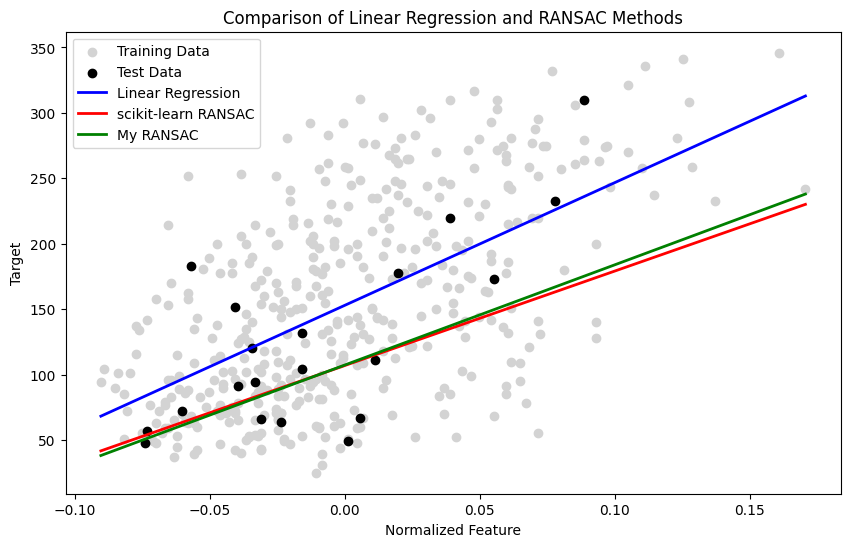

In [ ]:
# Import modules and libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature (the third feature)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

#Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# -----------------------------------------------------------------------
# Implementing RANSAC from scratch
# -------------------------------------------------------------------------
def ransac_linear_regression(X, y, n_iterations=1000, sample_size=2, threshold=10, min_inliers=10):
    best_model = None
    best_inliers = None
    max_inliers = 0

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(range(X.shape[0]), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = linear_model.LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all the data points using the model
        y_pred = model.predict(X)

        # Calculate residuals : errors
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold
        n_inliers = np.sum(inliers)

        # Update the best model if current one has more inliers
        if n_inliers > max_inliers and n_inliers >= min_inliers:
            max_inliers = n_inliers
            best_model = linear_model.LinearRegression()
            X_inliers = X[inliers]
            y_inliers = y[inliers]
            best_model.fit(X_inliers, y_inliers)
            best_inliers = inliers

    # If no good model was found,we fit to the entire dataset
    if best_model is None:
        best_model = linear_model.LinearRegression()
        best_model.fit(X, y)
        best_inliers = np.ones_like(y, dtype=bool)

    return best_model, best_inliers

# Apply Ransac_linear_regression implementation to the training data
best_model, best_inliers = ransac_linear_regression(X_train, y_train)

# Apply scikit-learn's RANSACRegressor
ransac = RANSACRegressor(residual_threshold=10, min_samples=2, random_state=42)
ransac.fit(X_train, y_train)

# Fit the standard linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Generate a range of X values for plotting within the range of X_train
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Make predictions using the models
y_line_pred = regr.predict(X_line)
y_ransac_pred = ransac.predict(X_line)
y_own_ransac_pred = best_model.predict(X_line)

# Calculate MSE for each model
mse_regr = mean_squared_error(y_test, regr.predict(X_test))
mse_ransac = mean_squared_error(y_test, ransac.predict(X_test))
mse_custom_ransac = mean_squared_error(y_test, best_model.predict(X_test))

# Plot outputs
plt.figure(figsize=(10, 6))

# Plot all training data points
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')

# Plot test data points
plt.scatter(X_test, y_test, color='black', label='Test Data')

# Plot standard linear regression line
plt.plot(X_line, y_line_pred, color='blue', linewidth=2, label='Linear Regression')

# Plot scikit-learn's RANSAC line
plt.plot(X_line, y_ransac_pred, color='red', linewidth=2, label='scikit-learn RANSAC')

# Plot your own RANSAC line
plt.plot(X_line, y_own_ransac_pred, color='green', linewidth=2, label='My RANSAC')

# Add legend and labels
plt.legend()
plt.xlabel('Normalized Feature')
plt.ylabel('Target')
plt.title('Comparison of Linear Regression and RANSAC Methods')

plt.show()


**a2)** Apply your method to the following cases:



### **Case 1: Random Noisy Points Dislocated Far on Both Sides**
**Description:**

* Use only the inliers from an inclined linear model (about 1000 points).
* Add extra $p%$ of noisy points (where $p$ can be 5%, 10%, 20%, 30%) by picking random elements of the data and perturbing them sufficiently with Gaussian noise so that they get dislocated far from the rest of the data on both sides.

Percentage of Outliers: 5%
Number of Inliers Detected: 923
Model Coefficients: Slope = 0.4994, Intercept = 0.1951
--------------------------------------------------


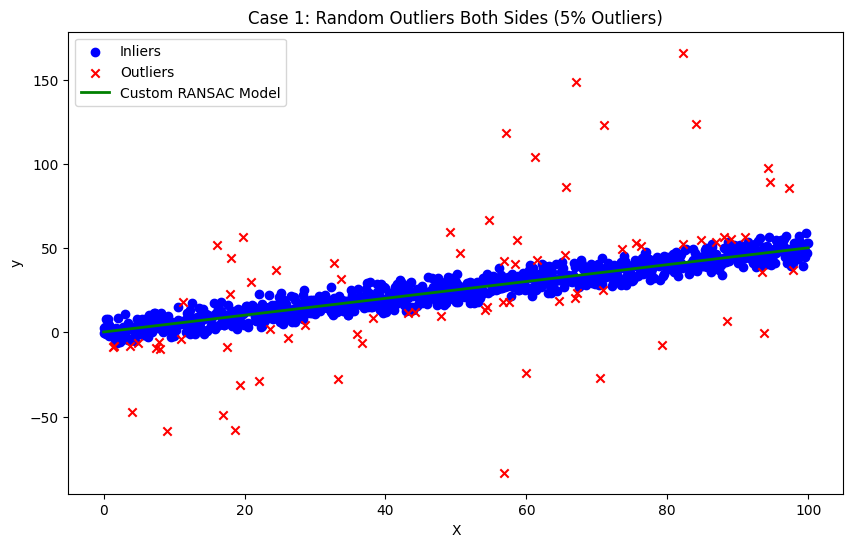

Percentage of Outliers: 10%
Number of Inliers Detected: 887
Model Coefficients: Slope = 0.5089, Intercept = -0.5561
--------------------------------------------------


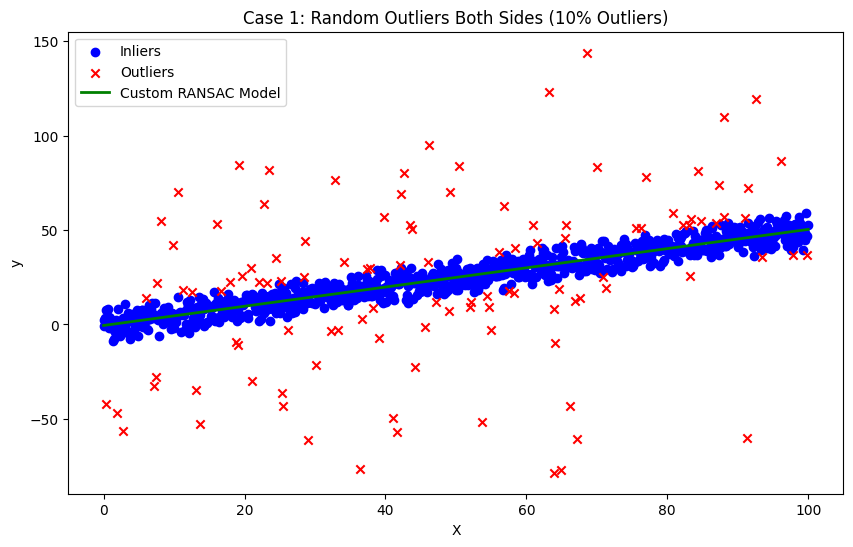

Percentage of Outliers: 20%
Number of Inliers Detected: 809
Model Coefficients: Slope = 0.5085, Intercept = -0.2725
--------------------------------------------------


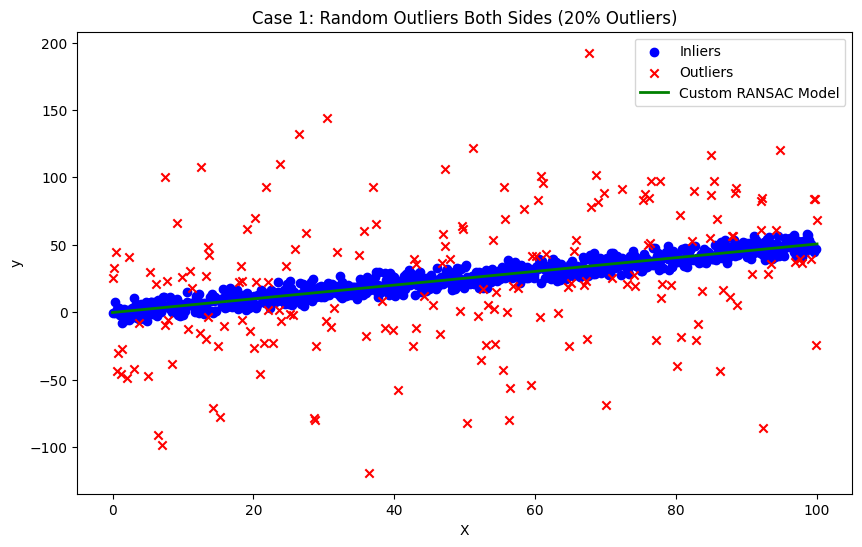

Percentage of Outliers: 30%
Number of Inliers Detected: 724
Model Coefficients: Slope = 0.5006, Intercept = 0.1020
--------------------------------------------------


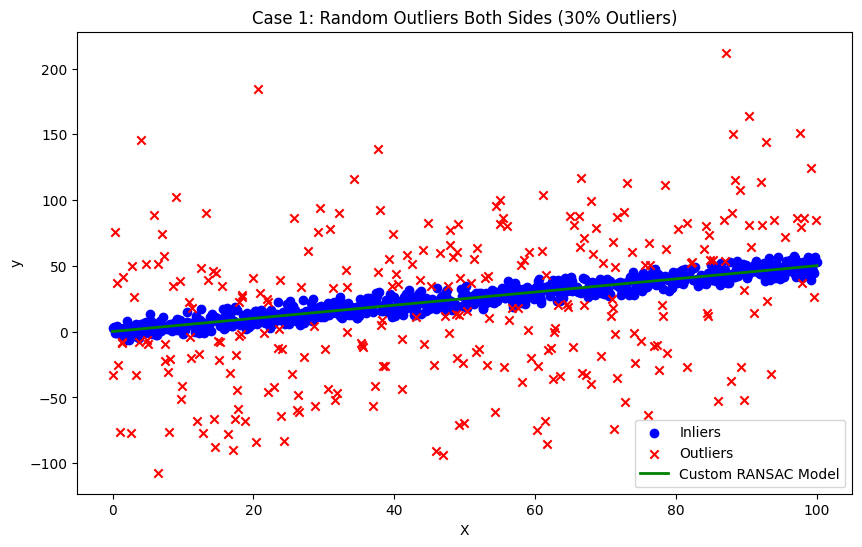

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Seed for reproducibility
np.random.seed(42)

# Updated Custom RANSAC implementation
def ransac_linear_regression(X, y, n_iterations=1000, sample_size=2, threshold=10, min_inliers=100):
    best_model = None
    best_inliers = None
    max_inliers = 0

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(len(X), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold
        n_inliers = np.sum(inliers)

        # Update the best model if current one has more inliers
        if n_inliers > max_inliers and n_inliers >= min_inliers:
            max_inliers = n_inliers
            best_model = LinearRegression()
            X_inliers_model = X[inliers]
            y_inliers_model = y[inliers]
            best_model.fit(X_inliers_model, y_inliers_model)
            best_inliers = inliers

    # If no good model was found, fit to the entire dataset
    if best_model is None:
        best_model = LinearRegression()
        best_model.fit(X, y)
        best_inliers = np.ones_like(y, dtype=bool)
        max_inliers = len(y)

    return best_model, best_inliers, max_inliers

# Function for Case 1
def case1_random_outliers_both_sides(X_inliers, y_inliers, p_percent):
    n_outliers = int(len(X_inliers) * p_percent / 100)

    # Randomly select indices to perturb
    outlier_indices = np.random.choice(len(X_inliers), n_outliers, replace=False)

    # Perturb selected points with large Gaussian noise on both sides
    y_outliers = y_inliers[outlier_indices] + np.random.normal(0, 50, n_outliers)

    # Replace the original y values with the perturbed ones
    y_total = y_inliers.copy()
    y_total[outlier_indices] = y_outliers

    X_total = X_inliers.copy()

    return X_total, y_total, outlier_indices

# Generate inliers: 1000 points along a line with some noise
n_inliers = 1000
X_inliers = np.linspace(0, 100, n_inliers).reshape(-1, 1)
y_inliers = 0.5 * X_inliers.squeeze() + np.random.normal(0, 5, n_inliers)

# Percentages of outliers to test
p_values = [5, 10, 20, 30]

for p in p_values:
    X_total, y_total, outlier_indices = case1_random_outliers_both_sides(X_inliers, y_inliers, p)

    # Apply custom RANSAC
    custom_ransac_model, inliers_mask, max_inliers = ransac_linear_regression(X_total, y_total)

    # Predict using the RANSAC model
    y_custom_ransac_pred = custom_ransac_model.predict(X_total)

    # Print results
    print(f"Percentage of Outliers: {p}%")
    print(f"Number of Inliers Detected: {max_inliers}")
    print(f"Model Coefficients: Slope = {custom_ransac_model.coef_[0]:.4f}, Intercept = {custom_ransac_model.intercept_:.4f}")
    print("-" * 50)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot inliers and outliers
    inliers = inliers_mask
    outliers = ~inliers

    plt.scatter(X_total[inliers], y_total[inliers], color='blue', marker='o', label='Inliers')
    plt.scatter(X_total[outliers], y_total[outliers], color='red', marker='x', label='Outliers')

    # Plot RANSAC regression line
    X_line = np.linspace(X_total.min(), X_total.max(), 100).reshape(-1, 1)
    y_line = custom_ransac_model.predict(X_line)
    plt.plot(X_line, y_line, color='green', linewidth=2, label='Custom RANSAC Model')

    plt.title(f'Case 1: Random Outliers Both Sides ({p}% Outliers)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


**Description:**

We introduce p% outliers by perturbing randomly selected points with Gaussian noise on both sides.

**Results:**

As the pourcentage of outliers p% incresases :   
- The number of inliers detected by custom RANSAC remains relatively stable up to a certain point.
- Tthe custom RANSAC starts to include some outliers as inliers, it may require parameters' adjustments like increasing `threshold` or `n_iterations` to maintain performance.
- The slope and intercept of the fitted line converge to the true model parameters despite the presence of outliers.


**Plot Interpretation:**
- The RANSAC line closely follows the inlier data, effectively ignoring the randomly distributed outliers.
- The scatter between the inlier and outlier regions becomes more pronounced with increasing p%.

--------------
*Note 1:*
The threshold $\tau$ determines the maximum allowable residual for a point to be considered an inlier: $ |y_i - \hat{y}_i| < \tau $

*Note 2:* The slope and intercept (the parameters of your linear regression model) define the specific line that best fits the data according to the least squares criterion (minimizing the sum of squared residuals)


###**Case 2: Random Noisy Points Only Above the Inlier Data**
**Description:**

* Use only the inliers from an inclined linear model.
* Add extra $p%$ of noisy points by picking random elements of the data and perturbing them with positive Gaussian noise so that they get dislocated far above the inlier data.



Percentage of Outliers: 5%
Number of Inliers Detected: 916
Model Coefficients: Slope = 0.4998, Intercept = 0.1907
--------------------------------------------------


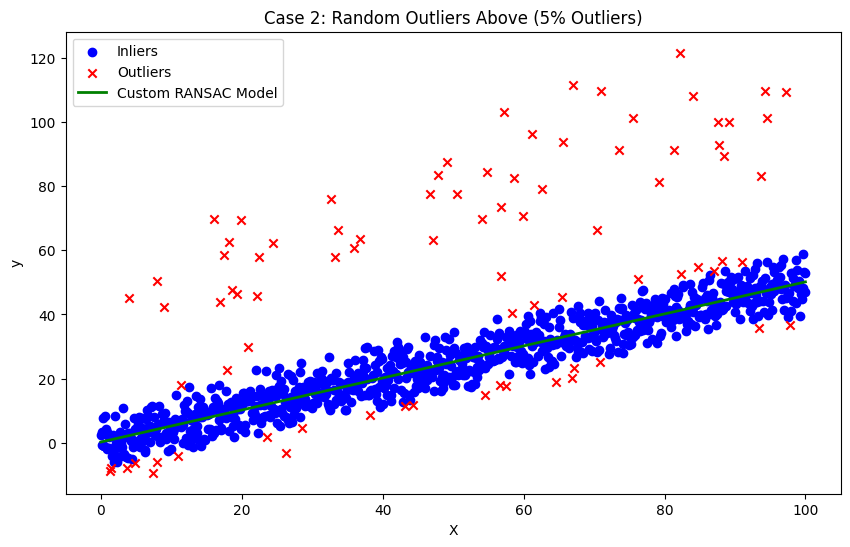

Percentage of Outliers: 10%
Number of Inliers Detected: 869
Model Coefficients: Slope = 0.5080, Intercept = -0.4584
--------------------------------------------------


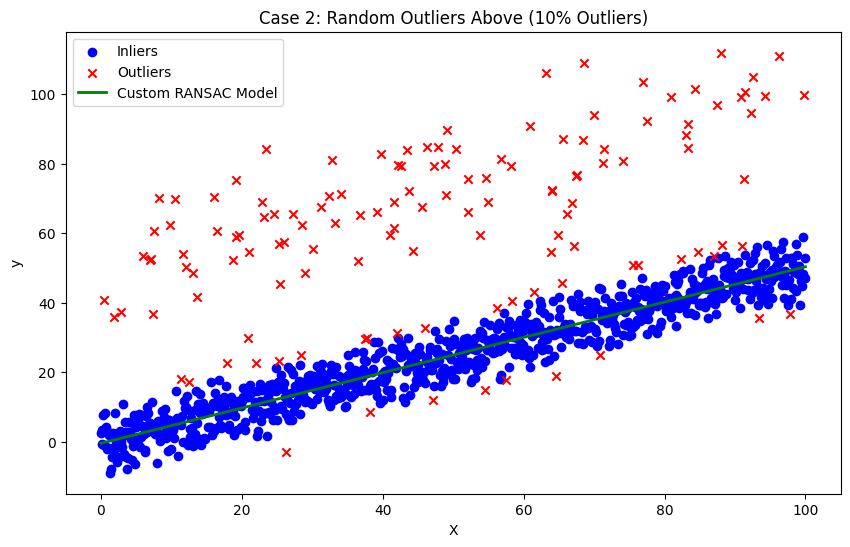

Percentage of Outliers: 20%
Number of Inliers Detected: 770
Model Coefficients: Slope = 0.5073, Intercept = -0.1846
--------------------------------------------------


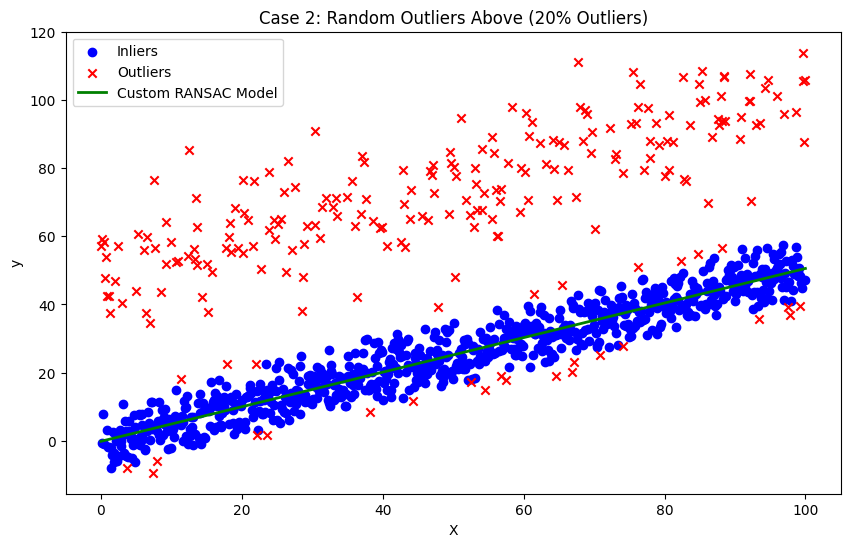

Percentage of Outliers: 30%
Number of Inliers Detected: 673
Model Coefficients: Slope = 0.5012, Intercept = -0.0539
--------------------------------------------------


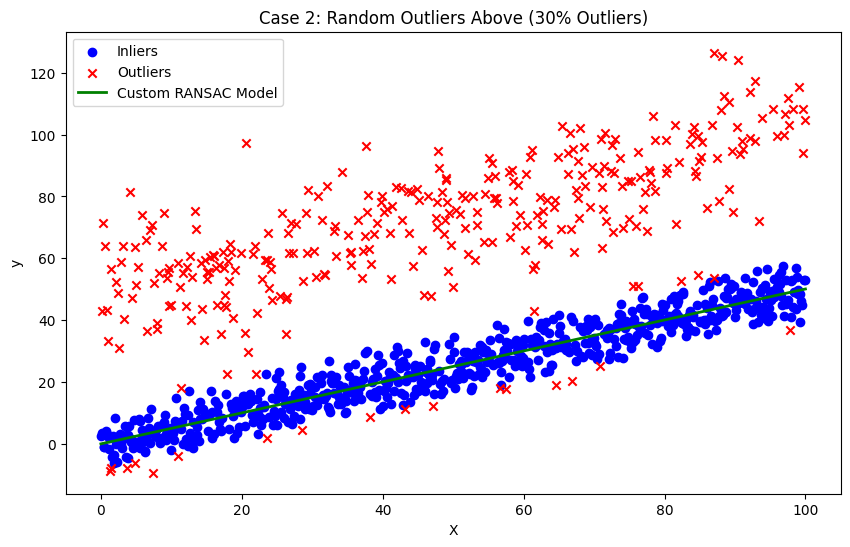

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Seed for reproducibility
np.random.seed(42)

# Updated Custom RANSAC implementation from a1)
def ransac_linear_regression(X, y, n_iterations=1000, sample_size=2, threshold=10, min_inliers=100):
    best_model = None
    best_inliers = None
    max_inliers = 0

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(len(X), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold
        n_inliers = np.sum(inliers)

        # Update the best model if current one has more inliers
        if n_inliers > max_inliers and n_inliers >= min_inliers:
            max_inliers = n_inliers
            best_model = LinearRegression()
            X_inliers_model = X[inliers]
            y_inliers_model = y[inliers]
            best_model.fit(X_inliers_model, y_inliers_model)
            best_inliers = inliers

    # If no good model was found, fit to the entire dataset
    if best_model is None:
        best_model = LinearRegression()
        best_model.fit(X, y)
        best_inliers = np.ones_like(y, dtype=bool)
        max_inliers = len(y)

    return best_model, best_inliers, max_inliers

# Function for Case 2
def case2_random_outliers_positive(X_inliers, y_inliers, p_percent):
    n_outliers = int(len(X_inliers) * p_percent / 100)

    # Randomly select indices to perturb
    outlier_indices = np.random.choice(len(X_inliers), n_outliers, replace=False)

    # Perturb selected points with large positive Gaussian noise
    y_outliers = y_inliers[outlier_indices] + np.abs(np.random.normal(50, 10, n_outliers))

    # Replaces the original y values with the perturbed ones
    y_total = y_inliers.copy()
    y_total[outlier_indices] = y_outliers

    X_total = X_inliers.copy()

    return X_total, y_total, outlier_indices

# Generate inliers: 1000 points along a line with some noise
n_inliers = 1000
X_inliers = np.linspace(0, 100, n_inliers).reshape(-1, 1)
y_inliers = 0.5 * X_inliers.squeeze() + np.random.normal(0, 5, n_inliers)

# Percentages of outliers to test
p_values = [5, 10, 20, 30]

for p in p_values:
    X_total, y_total, outlier_indices = case2_random_outliers_positive(X_inliers, y_inliers, p)

    # Apply custom RANSAC
    custom_ransac_model, inliers_mask, max_inliers = ransac_linear_regression(X_total, y_total)

    # Predict using the RANSAC model
    y_custom_ransac_pred = custom_ransac_model.predict(X_total)

    # Print results
    print(f"Percentage of Outliers: {p}%")
    print(f"Number of Inliers Detected: {max_inliers}")
    print(f"Model Coefficients: Slope = {custom_ransac_model.coef_[0]:.4f}, Intercept = {custom_ransac_model.intercept_:.4f}")
    print("-" * 50)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot inliers and outliers
    inliers = inliers_mask
    outliers = ~inliers

    plt.scatter(X_total[inliers], y_total[inliers], color='blue', marker='o', label='Inliers')
    plt.scatter(X_total[outliers], y_total[outliers], color='red', marker='x', label='Outliers')

    # Plot RANSAC regression line
    X_line = np.linspace(X_total.min(), X_total.max(), 100).reshape(-1, 1)
    y_line = custom_ransac_model.predict(X_line)
    plt.plot(X_line, y_line, color='green', linewidth=2, label='Custom RANSAC Model')

    plt.title(f'Case 2: Random Outliers Above ({p}% Outliers)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


**Observations:**

**Inlier Detection Efficiency:**
* **Positive Displacement:** Since all outliers are displaced above the inlier trend line, the residuals for outliers are consistently higher in the positive direction. This uniform displacement aids RANSAC in distinguishing outliers based on residual thresholds.
* **Consistency in Outliers:** The lack of variability in the direction of outliers (all above) reduces the complexity for RANSAC in identifying inliers, as the outliers do not introduce bidirectional noise.


**Impact on Regression Parameters:**
* **Slope and Intercept Stability:** The slope and intercept of the fitted RANSAC model remain relatively stable across varying percentages of outliers (5%, 10%, 20%, 30%). This stability indicates that RANSAC  isolates the inlier trend despite the consistent upward displacement of outliers.
* **Comparison with Standard Linear Regression:**  
The results shows the robustness pf custom RANSAC, since it maintains  the slope and intercept values close to the true inlier model unlike standard linear regression which is sensitive to outliers.

**Regression Line Alignment:**
* The RANSAC-fitted regression line (green) closely aligns with the inlier data ignoring the uniformly displaced outliers.
        
---------------
###**Conclusion :**

**Moderate Outlier Levels (5% - 20%):**
- RANSAC effectively identifies and excludes outliers.
- Regression parameters remain stable, closely matching the true inlier model.
- High inlier counts ensure reliable model fitting.
    
**igh Outlier Levels (30%):**
- Slight degradation in inlier detection but remains robust.
- Potential inclusion of a few outliers as inliers, leading to minimal shifts in regression parameters.
-Overall model performance remains superior to standard linear regression.



###**Case 3:  Perturbing Points with Lower y-coordinate (Lower Left Part of the Plot)**
**Description:**
* Use only the inliers from an inclined linear model.
Add extra $p$% of noisy points corresponding to the points with the lower y-coordinate (lower left part of the plot) and perturb them with negative Gaussian noise to dislocate them far from the rest of the data.
The perturbed data will not be randomly selected, but rather correspond to the p% of the points with lower y coordinate (the points at the lower left part of the plot).

Percentage of Outliers: 5%
Number of Inliers Detected: 919
Model Coefficients: Slope = 0.4896, Intercept = 0.9238
--------------------------------------------------


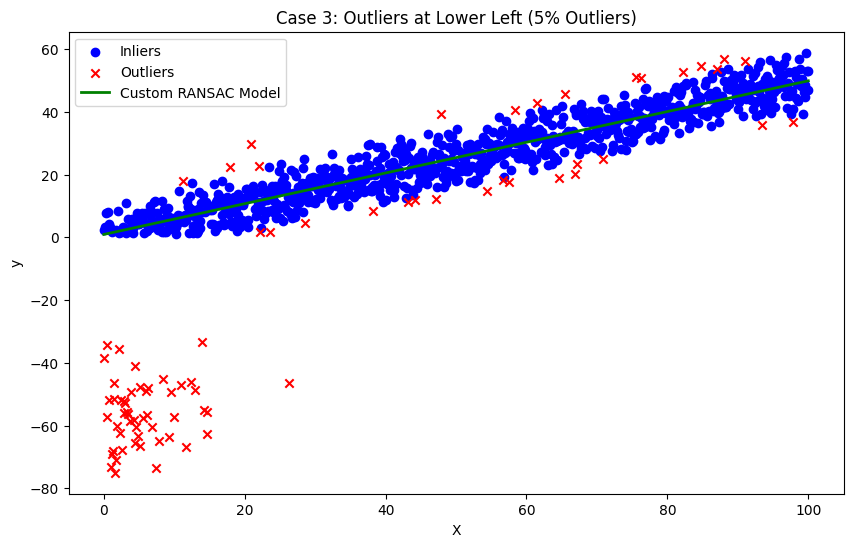

Percentage of Outliers: 10%
Number of Inliers Detected: 870
Model Coefficients: Slope = 0.4827, Intercept = 1.4799
--------------------------------------------------


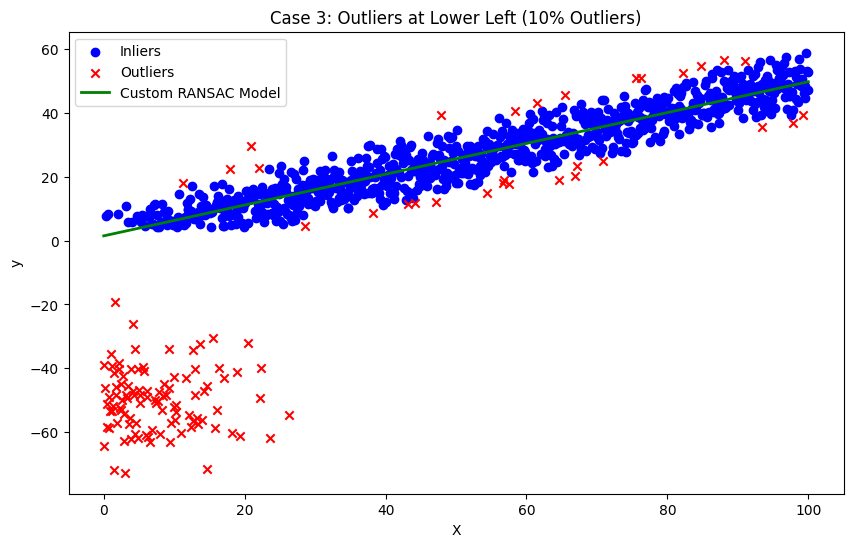

Percentage of Outliers: 20%
Number of Inliers Detected: 772
Model Coefficients: Slope = 0.4722, Intercept = 2.2428
--------------------------------------------------


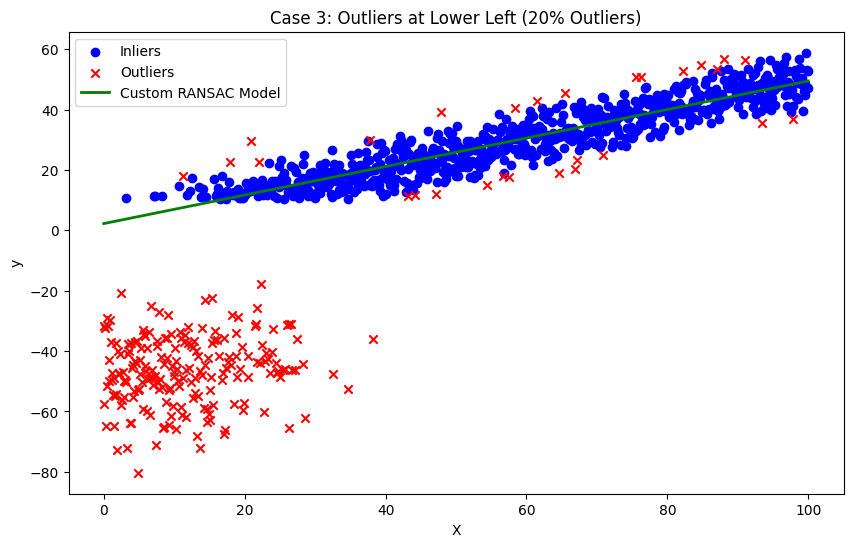

Percentage of Outliers: 30%
Number of Inliers Detected: 675
Model Coefficients: Slope = 0.4597, Intercept = 3.4271
--------------------------------------------------


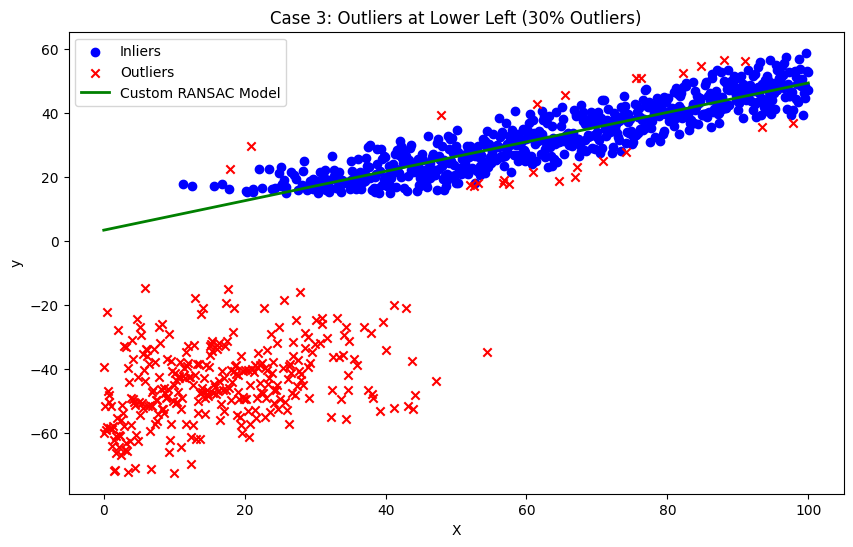

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Seed for reproducibility
np.random.seed(42)

# Updated Custom RANSAC implementation from a1)
def ransac_linear_regression(X, y, n_iterations=1000, sample_size=2, threshold=10, min_inliers=100):
    best_model = None
    best_inliers = None
    max_inliers = 0

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(len(X), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold
        n_inliers = np.sum(inliers)

        # Update the best model if current one has more inliers
        if n_inliers > max_inliers and n_inliers >= min_inliers:
            max_inliers = n_inliers
            best_model = LinearRegression()
            X_inliers_model = X[inliers]
            y_inliers_model = y[inliers]
            best_model.fit(X_inliers_model, y_inliers_model)
            best_inliers = inliers

    # If no good model was found, fit to the entire dataset
    if best_model is None:
        best_model = LinearRegression()
        best_model.fit(X, y)
        best_inliers = np.ones_like(y, dtype=bool)
        max_inliers = len(y)

    return best_model, best_inliers, max_inliers

# Function for Case 3
def case3_outliers_lower_left(X_inliers, y_inliers, p_percent):
    n_outliers = int(len(X_inliers) * p_percent / 100)

    # Get indices sorted by y-coordinate
    sorted_indices = np.argsort(y_inliers)

    # Select the indices corresponding to the lowest y values
    outlier_indices = sorted_indices[:n_outliers]

    # Perturb selected points with large negative Gaussian noise
    y_outliers = y_inliers[outlier_indices] - np.abs(np.random.normal(50, 10, n_outliers))

    # Replace the original y values with the perturbed ones
    y_total = y_inliers.copy()
    y_total[outlier_indices] = y_outliers

    X_total = X_inliers.copy()

    return X_total, y_total, outlier_indices

# Generate inliers: 1000 points along a line with some noise
n_inliers = 1000
X_inliers = np.linspace(0, 100, n_inliers).reshape(-1, 1)
y_inliers = 0.5 * X_inliers.squeeze() + np.random.normal(0, 5, n_inliers)

# Percentages of outliers to test
p_values = [5, 10, 20, 30]

for p in p_values:
    X_total, y_total, outlier_indices = case3_outliers_lower_left(X_inliers, y_inliers, p)

    # Apply custom RANSAC
    custom_ransac_model, inliers_mask, max_inliers = ransac_linear_regression(X_total, y_total)

    # Predict using the RANSAC model
    y_custom_ransac_pred = custom_ransac_model.predict(X_total)

    # Print results
    print(f"Percentage of Outliers: {p}%")
    print(f"Number of Inliers Detected: {max_inliers}")
    print(f"Model Coefficients: Slope = {custom_ransac_model.coef_[0]:.4f}, Intercept = {custom_ransac_model.intercept_:.4f}")
    print("-" * 50)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot inliers and outliers
    inliers = inliers_mask
    outliers = ~inliers

    plt.scatter(X_total[inliers], y_total[inliers], color='blue', marker='o', label='Inliers')
    plt.scatter(X_total[outliers], y_total[outliers], color='red', marker='x', label='Outliers')

    # Plot RANSAC regression line
    X_line = np.linspace(X_total.min(), X_total.max(), 100).reshape(-1, 1)
    y_line = custom_ransac_model.predict(X_line)
    plt.plot(X_line, y_line, color='green', linewidth=2, label='Custom RANSAC Model')

    plt.title(f'Case 3: Outliers at Lower Left ({p}% Outliers)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


**Low to Moderate Outlier Levels (5% - 20%):**

- RANSAC identifies and excludes the clustered outliers.
- Regression parameters remain relatively stable, with minor deviations at higher p% levels.
- Inliers count remains high ( reliable model fitting).

**High Outlier Levels 30%:**

- Increased difficulty in accurately isolating inliers due to the dense outlier cluster.
- Slight shifts in regression parameters as some outliers may be misclassified as inliers.


--------------------

***b)***
The original RANSAC uses inlying data points as votes for candidate models.

An alternative is to use the opposite approach: i.e. to use the models to vote for the most inlying points. Implement this variation that operates as follows:
Each time you subsample from the data, build a linear model, all inliers get a vote +1.
After having built the predefined number of models, use the top q% (e.g. 75%) voted points and build the final linear model using only those points.

Use the previous dataset or/and other variations you may generate to demonstrate differences in performance, and discuss the results.


### **Understanding the Alternative RANSAC Method**
**Standard RANSAC approach :**

The standard RANSAC iteratively selects random subsets of the data, fits a model to these subsets, and counts the number of inliers that agree with this model within a certain threshold.
The model with the highest number of inliers is selected as the best model.


**The alternative RANSAC Approach ?**

  In this alternative RANSAC, we flip the voting mechanism:
  * Instead of data points voting for models (i.e the number of inliers determining the best model),  models vote for data points.
  
  - Each time a model is built from a random subset, it predicts inliers (data points that fit the model within a threshold).
  
  - Each inlier data point receives a vote (+1) from the model.
  After building a predefined number of models, we select the top $ q$% of data points with the highest votes.

Then, we fit the **final model using only these top-voted data points**.

---------------------

-------
  **Alternative RANSAC Function Implementation :**

- **Voting Mechanism:** For each iteration, a linear model is fitted to a random subset of data points. Inliers (points with residuals below the threshold) receive a vote (+1)
- **Top-Voted Points Selection:** After all iterations, the top q% of points with the highest vote counts are selected as inliers.
- **Final Model Fitting** A linear model is fitted using only these top-voted inliers.
---------
---------

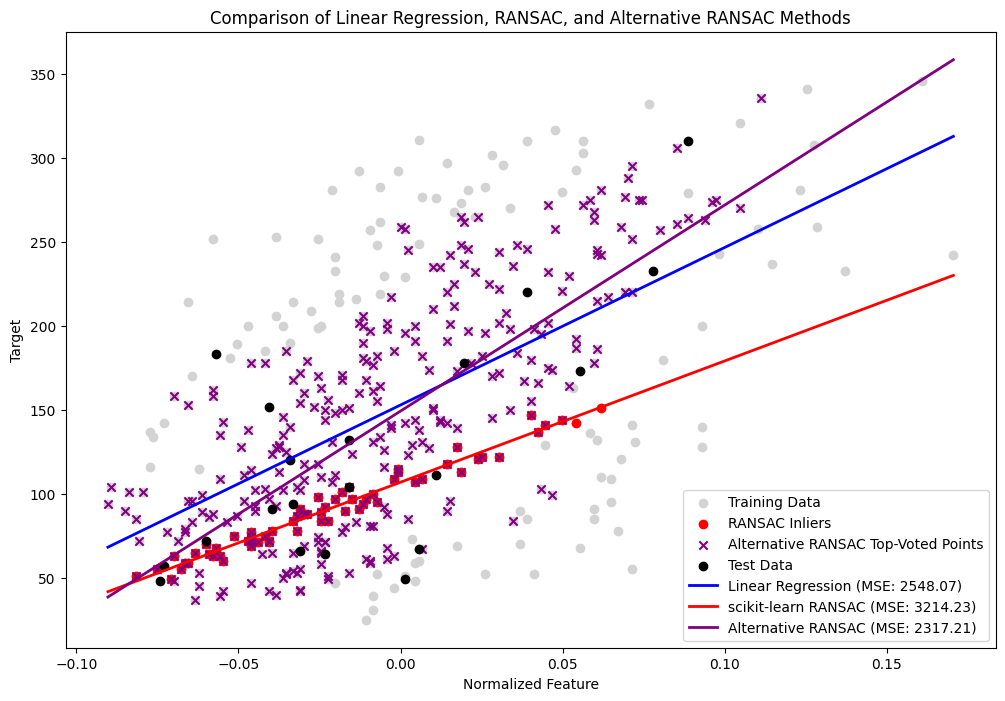

In [20]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

# -------------------------
# Implementing Alternative RANSAC
# -------------------------
def alternative_ransac(X, y, n_iterations=1000, sample_size=2, threshold=10, q_percent=75):
    """
    Alternative RANSAC implementation where models vote for inlying points.

    Parameters:
    - X (ndarray): Feature matrix.
    - y (ndarray): Target vector.
    - n_iterations (int): Number of iterations.
    - sample_size (int): Number of samples per iteration.
    - threshold (float): Residual threshold to identify inliers.
    - q_percent (float): Percentage of top-voted points to consider as final inliers.

    Returns:
    - final_model (LinearRegression): Final fitted linear model using top-voted points.
    - votes (ndarray): Vote counts for each data point.
    - top_indices (ndarray): Indices of top-voted points.
    """
    n_samples = X.shape[0]
    votes = np.zeros(n_samples, dtype=int)

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(range(n_samples), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = linear_model.LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold

        # Increment votes for inliers
        votes[inliers] += 1

    # Determine the number of top-voted points
    n_top = int(n_samples * q_percent / 100)

    # Identify top-voted points
    top_indices = np.argsort(votes)[-n_top:]

    # Fit the final model using top-voted points
    final_model = linear_model.LinearRegression()
    final_model.fit(X[top_indices], y[top_indices])

    return final_model, votes, top_indices

# -------------------------
# Load the diabetes dataset
# -------------------------
diabetes = datasets.load_diabetes()

# Use only one feature (the third feature)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# -------------------------
# Apply Standard RANSACRegressor
# -------------------------
ransac = RANSACRegressor(residual_threshold=10, min_samples=2, random_state=42)
ransac.fit(X_train, y_train)

# -------------------------
# Apply Standard Linear Regression
# -------------------------
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# -------------------------
# Apply Alternative RANSAC
# -------------------------
alt_ransac_model, votes, top_indices = alternative_ransac(
    X_train, y_train, n_iterations=1000, sample_size=2, threshold=10, q_percent=75)

# -------------------------
# Generate a range of X values for plotting
# -------------------------
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Make predictions using the models
y_pred_regr = regr.predict(X_line)
y_pred_ransac = ransac.predict(X_line)
y_pred_alt_ransac = alt_ransac_model.predict(X_line)

# Calculate Mean Squared Error (MSE) for each model on the test set
mse_regr = mean_squared_error(y_test, regr.predict(X_test))
mse_ransac = mean_squared_error(y_test, ransac.predict(X_test))
mse_alt_ransac = mean_squared_error(y_test, alt_ransac_model.predict(X_test))

# Identify inliers from standard RANSAC
inliers_ransac = ransac.inlier_mask_
# Identify inliers from Alternative RANSAC
inliers_alt_ransac = np.zeros_like(y_train, dtype=bool)
inliers_alt_ransac[top_indices] = True

# -------------------------
# Plotting the Results
# -------------------------
plt.figure(figsize=(12, 8))

# Plot all training data points
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')

# Highlight inliers detected by standard RANSAC
plt.scatter(X_train[inliers_ransac], y_train[inliers_ransac], color='red', marker='o', label='RANSAC Inliers')

# Highlight top-voted points detected by Alternative RANSAC
plt.scatter(X_train[top_indices], y_train[top_indices], color='purple', marker='x', label='Alternative RANSAC Top-Voted Points')

# Plot test data points
plt.scatter(X_test, y_test, color='black', label='Test Data')

# Plot standard linear regression line
plt.plot(X_line, y_pred_regr, color='blue', linewidth=2, label=f'Linear Regression (MSE: {mse_regr:.2f})')

# Plot standard RANSAC line
plt.plot(X_line, y_pred_ransac, color='red', linewidth=2, label=f'scikit-learn RANSAC (MSE: {mse_ransac:.2f})')

# Plot Alternative RANSAC line
plt.plot(X_line, y_pred_alt_ransac, color='purple', linewidth=2, label=f'Alternative RANSAC (MSE: {mse_alt_ransac:.2f})')

# Add legend and labels
plt.legend()
plt.xlabel('Normalized Feature')
plt.ylabel('Target')
plt.title('Comparison of Linear Regression, RANSAC, and Alternative RANSAC Methods')

plt.show()


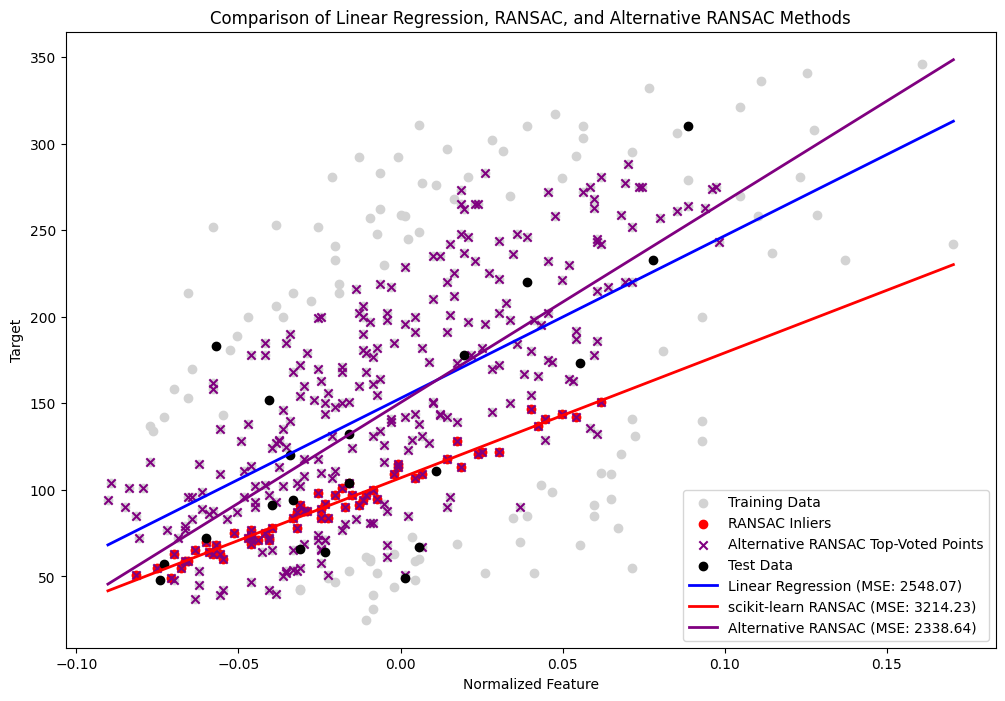

In [15]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error

# --------------------------------------------
# Implementing Alternative RANSAC
# ------------------------------------------------
def alternative_ransac(X, y, n_iterations=1000, sample_size=2, threshold=10, q_percent=75):
    """
    Alternative RANSAC implementation where models vote for inlying points.

    Parameters:
    - X (ndarray): Feature matrix.
    - y (ndarray): Target vector.
    - n_iterations (int): Number of iterations.
    - sample_size (int): Number of samples per iteration.
    - threshold (float): Residual threshold to identify inliers
    - q_percent (float): Percentage of top-voted points to consider as final inliers.

    Returns:
    - final_model (LinearRegression): Final fitted linear model using top-voted points.
    - votes (ndarray): Vote counts for each data point.
    - top_indices (ndarray): Indices of top-voted points.
    """
    n_samples = X.shape[0]
    votes = np.zeros(n_samples, dtype=int)

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(range(n_samples), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = linear_model.LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold

        # Increment votes for inliers
        votes[inliers] += 1

    # Determine the number of top-voted points
    n_top = int(n_samples * q_percent / 100)

    # Identify top-voted points
    top_indices = np.argsort(votes)[-n_top:]

    # Fit the final model using top-voted points
    final_model = linear_model.LinearRegression()
    final_model.fit(X[top_indices], y[top_indices])

    return final_model, votes, top_indices

# -----------------------------------
# Load the diabetes dataset
# -----------------------------------
diabetes = datasets.load_diabetes()

# Use only one feature (the third feature)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# ----------------------------------
# Apply Standard RANSACRegressor
# ----------------------------------
ransac = RANSACRegressor(residual_threshold=10, min_samples=2, random_state=42)
ransac.fit(X_train, y_train)

# ----------------------------------
# Apply Standard Linear Regression
# -----------------------------------
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# --------------------------------
# Apply Alternative RANSAC
# --------------------------------
alt_ransac_model, votes, top_indices = alternative_ransac(
    X_train, y_train, n_iterations=1000, sample_size=2, threshold=10, q_percent=75)

# ----------------------------------------------
# Generate a range of X values for plotting
# ----------------------------------------------
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Making predictions using the models
y_pred_regr = regr.predict(X_line)
y_pred_ransac = ransac.predict(X_line)
y_pred_alt_ransac = alt_ransac_model.predict(X_line)

# Calculates Mean Squared Error (MSE) for each model on the test set
mse_regr = mean_squared_error(y_test, regr.predict(X_test))
mse_ransac = mean_squared_error(y_test, ransac.predict(X_test))
mse_alt_ransac = mean_squared_error(y_test, alt_ransac_model.predict(X_test))

# Identify inliers from standard RANSAC
inliers_ransac = ransac.inlier_mask_
# Identify inliers from Alternative RANSAC
inliers_alt_ransac = np.zeros_like(y_train, dtype=bool)
inliers_alt_ransac[top_indices] = True

# ------------------------- #
# Plotting the Results      #
# ------------------------- #
plt.figure(figsize=(12, 8))

# Plot all training data points
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')

# Highlight inliers detected by standard RANSAC
plt.scatter(X_train[inliers_ransac], y_train[inliers_ransac], color='red', marker='o', label='RANSAC Inliers')

# Highlight top-voted points detected by Alternative RANSAC
plt.scatter(X_train[top_indices], y_train[top_indices], color='purple', marker='x', label='Alternative RANSAC Top-Voted Points')

# Plot test data points
plt.scatter(X_test, y_test, color='black', label='Test Data')

# Plot standard linear regression line
plt.plot(X_line, y_pred_regr, color='blue', linewidth=2, label=f'Linear Regression (MSE: {mse_regr:.2f})')

# Plot standard RANSAC line
plt.plot(X_line, y_pred_ransac, color='red', linewidth=2, label=f'scikit-learn RANSAC (MSE: {mse_ransac:.2f})')

# Plot Alternative RANSAC line
plt.plot(X_line, y_pred_alt_ransac, color='purple', linewidth=2, label=f'Alternative RANSAC (MSE: {mse_alt_ransac:.2f})')

# Add legend and labels
plt.legend()
plt.xlabel('Normalized Feature')
plt.ylabel('Target')
plt.title('Comparison of Linear Regression, RANSAC, and Alternative RANSAC Methods')
plt.show()




Here are a more advanced results visualization of the Alternative RANSAC Approach :


--- Performance Metrics ---
Standard Linear Regression MSE: 2548.07
scikit-learn RANSAC MSE: 3214.23
Alternative RANSAC MSE: 2246.12

Number of Inliers Detected by scikit-learn RANSAC: 63
Number of Inliers Detected by Alternative RANSAC: 316


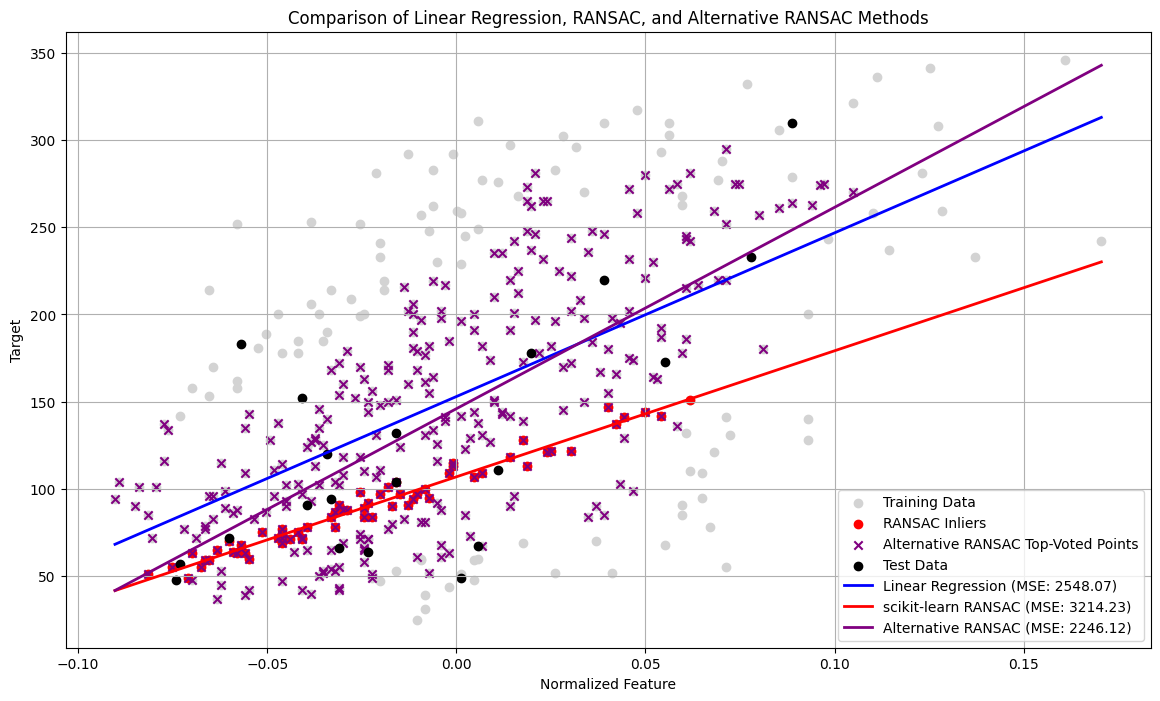

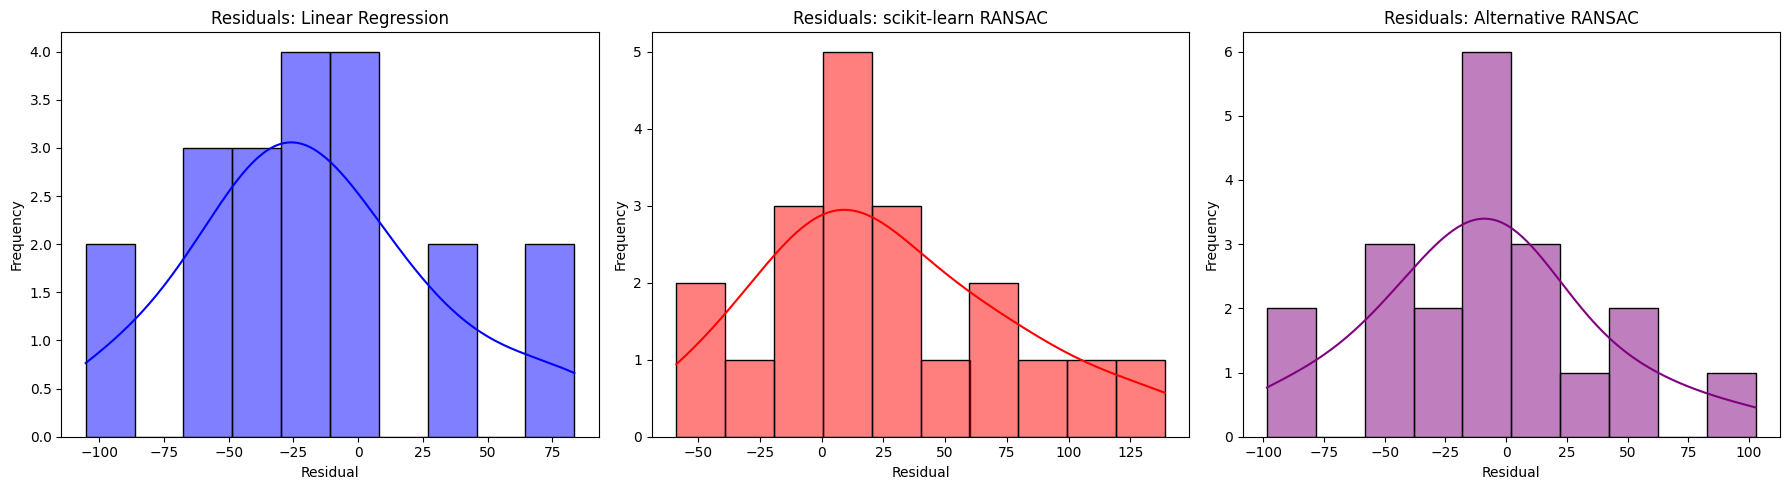

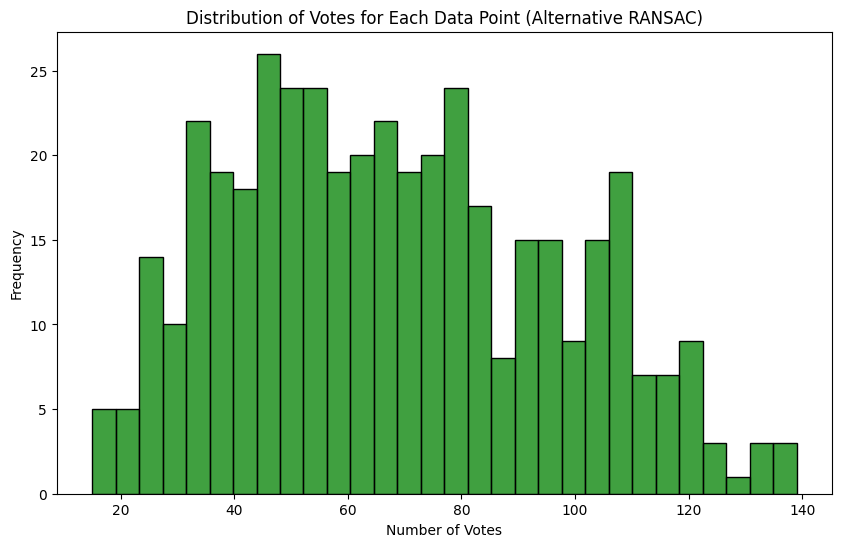

In [21]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn as sns

# --------------------------------------------
# Implementing Alternative RANSAC
# --------------------------------------------
def alternative_ransac(X, y, n_iterations=1000, sample_size=2, threshold=10, q_percent=75):
    """
    Alternative RANSAC implementation where models vote for inlying points.

    Parameters:
    - X (ndarray): Feature matrix.
    - y (ndarray): Target vector.
    - n_iterations (int): Number of iterations.
    - sample_size (int): Number of samples per iteration.
    - threshold (float): Residual threshold to identify inliers.
    - q_percent (float): Percentage of top-voted points to consider as final inliers.

    Returns:
    - final_model (LinearRegression): Final fitted linear model using top-voted points.
    - votes (ndarray): Vote counts for each data point.
    - top_indices (ndarray): Indices of top-voted points.
    """
    n_samples = X.shape[0]
    votes = np.zeros(n_samples, dtype=int)

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(range(n_samples), size=sample_size, replace=False)
        X_sample = X[indices]
        y_sample = y[indices]

        # Fit a linear model to the subset
        model = linear_model.LinearRegression()
        model.fit(X_sample, y_sample)

        # Predict all data points using the model
        y_pred = model.predict(X)

        # Calculate residuals (errors)
        residuals = np.abs(y - y_pred)

        # Identify inliers based on the threshold
        inliers = residuals < threshold

        # Increment votes for inliers
        votes[inliers] += 1

    # Determine the number of top-voted points
    n_top = int(n_samples * q_percent / 100)

    # Identify top-voted points
    top_indices = np.argsort(votes)[-n_top:]

    # Fit the final model using top-voted points
    final_model = linear_model.LinearRegression()
    final_model.fit(X[top_indices], y[top_indices])

    return final_model, votes, top_indices

# -----------------------------------
# Load the diabetes dataset
# -----------------------------------
diabetes = datasets.load_diabetes()

# Use only one feature (the third feature)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# ----------------------------------
# Apply Standard RANSACRegressor
# ----------------------------------
ransac = RANSACRegressor(residual_threshold=10, min_samples=2, random_state=42)
ransac.fit(X_train, y_train)
mse_ransac = mean_squared_error(y_test, ransac.predict(X_test))

# ----------------------------------
# Apply Standard Linear Regression
# ----------------------------------
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# --------------------------------
# Apply Alternative RANSAC
# --------------------------------
alt_ransac_model, votes, top_indices = alternative_ransac(
    X_train, y_train, n_iterations=1000, sample_size=2, threshold=10, q_percent=75
)

print(f"Cross-Validated MSE - Linear Regression: {mse_regr_cv:.2f}")
print(f"Cross-Validated MSE - scikit-learn RANSAC: {mse_ransac_cv:.2f}")

# ----------------------------------------------
# Generate a range of X values for plotting
# ----------------------------------------------
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Making predictions using the models for plotting
y_pred_regr_line = regr.predict(X_line)
y_pred_ransac_line = ransac.predict(X_line)
y_pred_alt_ransac_line = alt_ransac_model.predict(X_line)

# Predictions on the test set
y_pred_regr_test = regr.predict(X_test)
y_pred_ransac_test = ransac.predict(X_test)
y_pred_alt_ransac_test = alt_ransac_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for each model on the test set
mse_regr = mean_squared_error(y_test, y_pred_regr_test)
mse_ransac = mean_squared_error(y_test, y_pred_ransac_test)
mse_alt_ransac = mean_squared_error(y_test, y_pred_alt_ransac_test)

# Identify inliers from standard RANSAC
inliers_ransac = ransac.inlier_mask_
# Identify inliers from Alternative RANSAC
inliers_alt_ransac = np.zeros_like(y_train, dtype=bool)
inliers_alt_ransac[top_indices] = True

# -------------------------
# Display Results in Text Form
# -------------------------
print("\n--- Performance Metrics ---")
print(f"Standard Linear Regression MSE: {mse_regr:.2f}")
print(f"scikit-learn RANSAC MSE: {mse_ransac:.2f}")
print(f"Alternative RANSAC MSE: {mse_alt_ransac:.2f}")

# Count of inliers for RANSAC methods
num_inliers_ransac = np.sum(inliers_ransac)
num_inliers_alt_ransac = np.sum(inliers_alt_ransac)
print(f"\nNumber of Inliers Detected by scikit-learn RANSAC: {num_inliers_ransac}")
print(f"Number of Inliers Detected by Alternative RANSAC: {num_inliers_alt_ransac}")

# -------------------------
# Plotting the Results
# -------------------------
plt.figure(figsize=(14, 8))

# Plot all training data points
plt.scatter(X_train, y_train, color='lightgray', label='Training Data')

# Highlight inliers detected by standard RANSAC
plt.scatter(
    X_train[inliers_ransac],
    y_train[inliers_ransac],
    color='red',
    marker='o',
    label='RANSAC Inliers'
)

# Highlight top-voted points detected by Alternative RANSAC
plt.scatter(
    X_train[top_indices],
    y_train[top_indices],
    color='purple',
    marker='x',
    label='Alternative RANSAC Top-Voted Points'
)

# Plot test data points
plt.scatter(X_test, y_test, color='black', label='Test Data')

# Plot standard linear regression line
plt.plot(
    X_line,
    y_pred_regr_line,
    color='blue',
    linewidth=2,
    label=f'Linear Regression (MSE: {mse_regr:.2f})'
)

# Plot scikit-learn's RANSAC regression line
plt.plot(
    X_line,
    y_pred_ransac_line,
    color='red',
    linewidth=2,
    label=f'scikit-learn RANSAC (MSE: {mse_ransac:.2f})'
)

# Plot Alternative RANSAC regression line
plt.plot(
    X_line,
    y_pred_alt_ransac_line,
    color='purple',
    linewidth=2,
    label=f'Alternative RANSAC (MSE: {mse_alt_ransac:.2f})'
)

# Add legend and labels
plt.legend()
plt.xlabel('Normalized Feature')
plt.ylabel('Target')
plt.title('Comparison of Linear Regression, RANSAC, and Alternative RANSAC Methods')
plt.grid(True)
plt.show()

# -------------------------
# Residuals Analysis
# -------------------------
# Calculate residuals for each model on the test set
residuals_regr = y_test - y_pred_regr_test
residuals_ransac = y_test - y_pred_ransac_test
residuals_alt_ransac = y_test - y_pred_alt_ransac_test

# Plot residual distributions
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(residuals_regr, bins=10, kde=True, color='blue')
plt.title('Residuals: Linear Regression')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(residuals_ransac, bins=10, kde=True, color='red')
plt.title('Residuals: scikit-learn RANSAC')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(residuals_alt_ransac, bins=10, kde=True, color='purple')
plt.title('Residuals: Alternative RANSAC')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# -------------------------
# Vote Distribution Visualization
# -------------------------
plt.figure(figsize=(10, 6))
sns.histplot(votes, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Votes for Each Data Point (Alternative RANSAC)')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()


###**Results Discussion :**




## References

1. Fischler, M. A., & Bolles, R. C. (1981). *Random sample consensus: A paradigm for model fitting with applications to image analysis and automated cartography*. Communications of the ACM, 24(6), 381-395.

2. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research, 12, 2825-2830.

3. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer.

4. Scikit-learn Documentation. *RANSACRegressor*. Retrieved from [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)

5. Zhou, C., Xu, C., & Huang, H. (2020). *A Review on Robust Estimation and Its Application in Computer Vision*. Journal of Visual Communication and Image Representation, 72, 102907.


c) As discussed in the class, the logic behind the RANSAC could actually be seen as a more general tool than just performing regression. More specifically, it can be seen as a way to perfom various kinds of robust estimation.

c1) Assume for example the problem where we have a point-cloud of data and we want to estimate their "center", as a group representative, but in a robust way. The figure above illustrates an example where the input data contains $100$ inliers and $10$ outliers, which however you don't know a priori. Here, the inliers come from a Gaussian distribution with $\mu = (0,0)$ and $\sigma = 0.83$, while the ouliers come from a Gaussian dislocated at $\mu = (0,0)$ and $\sigma = 1.5$. You can get the [.mat data file](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/cloud-of-points-data.mat) with this example and/or write your own code to generate it.

How would you design a solution to this problem that adopts the RANSAC principle so that for this kind of data input we can compute a representative as close as possible to the mean of the inliers?


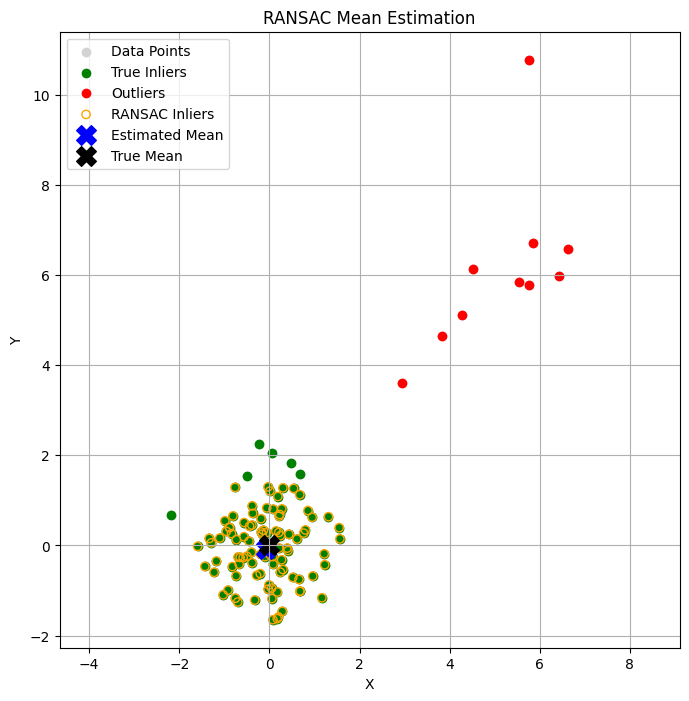

Estimated Center: [-0.08423144 -0.07542941]
True Center: [0 0]
Number of Inliers Detected: 94


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Number of inliers and outliers
n_inliers = 100
n_outliers = 10

# Generate inliers
mu_inliers = np.array([0, 0])
sigma_inliers = 0.83
inliers = np.random.normal(mu_inliers, sigma_inliers, size=(n_inliers, 2))

# Generate outliers (dislocated)
mu_outliers = np.array([5, 5])  # Dislocated mean
sigma_outliers = 1.5
outliers = np.random.normal(mu_outliers, sigma_outliers, size=(n_outliers, 2))

# Combine inliers and outliers into a single dataset
data = np.vstack((inliers, outliers))

# RANSAC Algorithm for center estimation
def ransac_center_estimation(data, n_iterations=1000, sample_size=2, threshold=1.66):
    best_center = None
    best_inliers = None
    max_inliers = 0

    for _ in range(n_iterations):
        # Randomly select a subset of data points
        indices = np.random.choice(len(data), size=sample_size, replace=False)
        sample_points = data[indices]

        # Compute candidate center (mean of sample points)
        candidate_center = np.mean(sample_points, axis=0)

        # Compute distances from candidate center to all data points
        distances = np.linalg.norm(data - candidate_center, axis=1)

        # Identify inliers based on the threshold
        inliers = distances < threshold
        n_inliers = np.sum(inliers)

        # Update the best model if current one has more inliers
        if n_inliers > max_inliers:
            max_inliers = n_inliers
            best_center = candidate_center
            best_inliers = inliers

    # Compute final center as mean of inliers from the best model
    final_center = np.mean(data[best_inliers], axis=0)
    return final_center, best_inliers

# Parameters
n_iterations = 1000
threshold = 1.66  # Approximately 2 * sigma_inliers

# Run RANSAC
estimated_center, inliers_mask = ransac_center_estimation(data, n_iterations, sample_size=2, threshold=threshold)

# Filter inliers detected by RANSAC
inliers_ransac = data[inliers_mask]

# -------------------------
# Visualization of Results
# -------------------------
plt.figure(figsize=(8, 8))

# Plot all data points in light gray
plt.scatter(data[:, 0], data[:, 1], color='lightgray', label='Data Points')

# Plot true inliers in green
plt.scatter(inliers[:, 0], inliers[:, 1], color='green', label='True Inliers')

# Plot true outliers in red
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')

# Plot RANSAC-detected inliers with orange edge
plt.scatter(
    inliers_ransac[:, 0],
    inliers_ransac[:, 1],
    facecolors='none',
    edgecolors='orange',
    label='RANSAC Inliers'
)

# Plot the estimated mean/center from RANSAC in blue 'X'
plt.scatter(
    estimated_center[0],
    estimated_center[1],
    color='blue',
    marker='X',
    s=200,
    label='Estimated Mean'
)

# Plot the true center in black 'X'
plt.scatter(
    mu_inliers[0],
    mu_inliers[1],
    color='black',
    marker='X',
    s=200,
    label='True Mean'
)

# Customize plot with title, labels, and grid
plt.title('RANSAC Mean Estimation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# -------------------------
# Print the Results
# -------------------------
print(f"Estimated Center: {estimated_center}")
print(f"True Center: {mu_inliers}")
print(f"Number of Inliers Detected: {np.sum(inliers_mask)}")


c2) Extend this approach to the clustering of the data in a given number of $k$ clusters by considering a centroid-based clustering method (e.g. $k$-means) as the internal model learner. Provide an implementation and demonstrate some example(s).

*** Running RANSAC-Based K-Means Clustering ...
RANSAC Iteration 200/1000 - Inliers: 283
RANSAC Iteration 400/1000 - Inliers: 270
RANSAC Iteration 600/1000 - Inliers: 254
RANSAC Iteration 800/1000 - Inliers: 276
RANSAC Iteration 1000/1000 - Inliers: 204
RANSAC-Based K-Means Clustering Completed.

*** Running Standard K-Means Clustering ...
Standard K-Means Clustering Completed.

Silhouette Score (Standard K-Means): 0.7628
Silhouette Score (RANSAC-Based K-Means, Inliers): 0.8584
Overlap of Inliers between RANSAC-Based and Standard K-Means: 98 out of 293



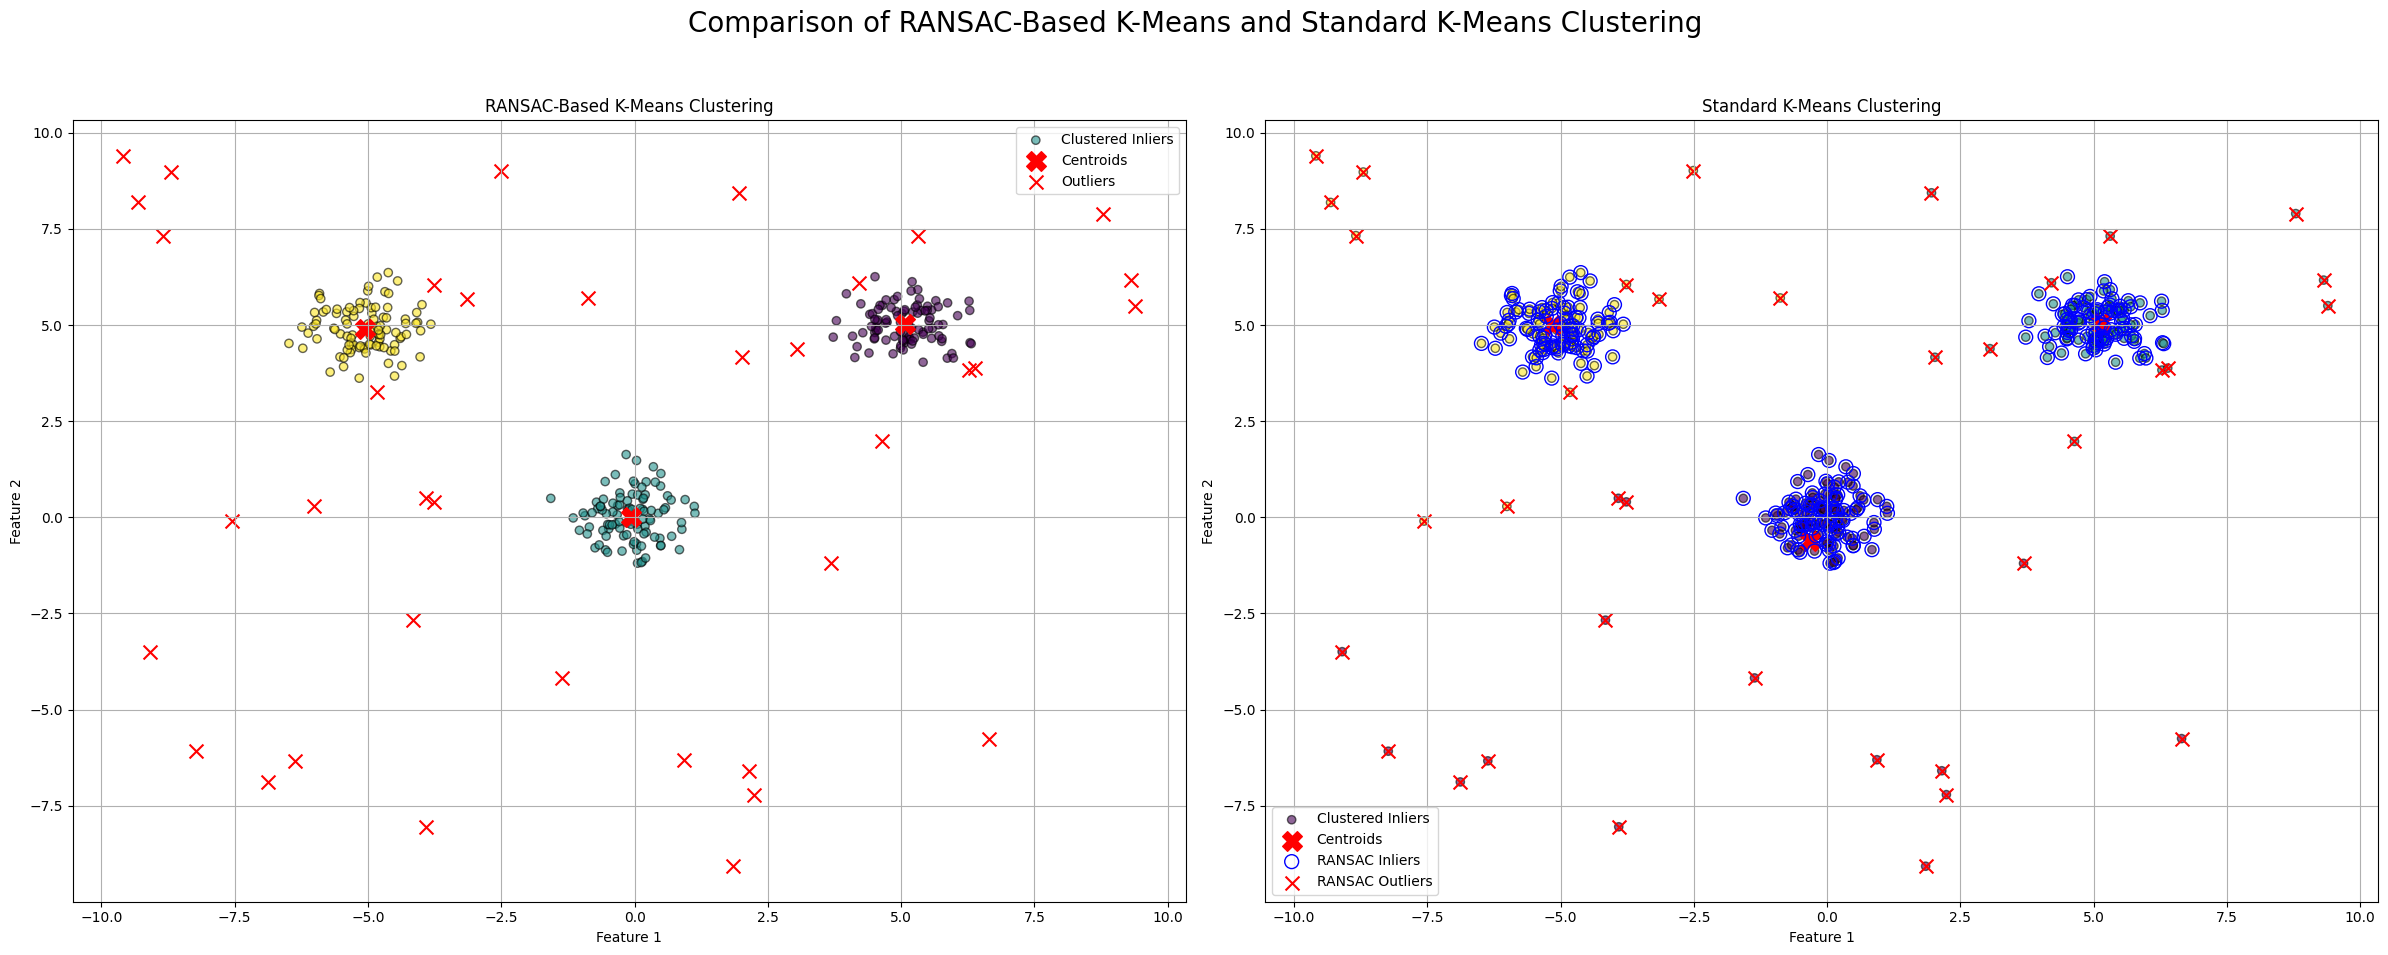

--- Cluster Centers ---
RANSAC-Based K-Means Centroids:
 [[ 5.07846505  5.02215778]
 [-0.06933855  0.02041339]
 [-5.05904103  4.90508867]]
Standard K-Means Centroids:
 [[-0.32265641 -0.61622936]
 [ 5.13027749  5.06366524]
 [-5.14603703  4.99510051]]

--- Inlier Detection ---
RANSAC-Based K-Means: 293 inliers detected, 30 outliers.
Standard K-Means: All 330 points assigned to clusters.

--- Silhouette Scores ---
Silhouette Score (Standard K-Means): 0.7628
Silhouette Score (RANSAC-Based K-Means, Inliers): 0.8584

Overlap of Inliers between RANSAC-Based and Standard K-Means: 98 out of 293


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Seed for reproducibility
np.random.seed(42)

# -----------------
# Generate DATA
# -----------------

# Number of inliers and outliers
n_inliers = 300
n_outliers = 30

# Generate inliers clustered around specified centers
mu_inliers = np.array([[0, 0], [5, 5], [-5, 5]])
sigma_inliers = 0.6
inliers, y_true = make_blobs(n_samples=n_inliers, centers=mu_inliers, cluster_std=sigma_inliers, random_state=42)

# Generate outliers uniformly distributed in a larger space
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

# Combine inliers and outliers into a single dataset
X = np.vstack((inliers, outliers))

# ----------------------------------
# RANSAC-Based K-Means Clustering
# -----------------------------------
def ransac_kmeans(X, k, n_iterations=1000, sample_size=15, threshold=1.5):
    """
    RANSAC-based K-Means clustering.

    Parameters:
    - X (ndarray): Dataset.
    - k (int): Number of clusters.
    - n_iterations (int): Number of RANSAC iterations.
    - sample_size (int): Number of samples per iteration.
    - threshold (float): Distance threshold to consider a point as an inlier.

    Returns:
    - best_centroids (ndarray): Centroids of the best model.
    - best_labels (ndarray): Cluster labels for inlier points.
    - best_inliers_mask (ndarray): Boolean mask of inliers.
    """
    best_inlier_count = 0
    best_centroids = None
    best_labels = None
    best_inliers_mask = None

    n_samples = X.shape[0]

    for i in range(n_iterations):
        # Randomly sample a subset of data points
        sample_indices = np.random.choice(n_samples, sample_size, replace=False)
        X_sample = X[sample_indices]

        # Fit K-Means to the sampled data
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_sample)
        centroids = kmeans.cluster_centers_

        # Compute distances from all points to the nearest centroid
        distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids], axis=0)

        # Identify inliers based on the threshold
        inliers_mask = distances < threshold
        n_inliers = np.sum(inliers_mask)

        # Update the best model if the current one has more inliers
        if n_inliers > best_inlier_count:
            best_inlier_count = n_inliers
            best_centroids = centroids
            best_inliers_mask = inliers_mask.copy()

        # Optional: Progress tracking
        if (i+1) % 200 == 0:
            print(f"RANSAC Iteration {i+1}/{n_iterations} - Inliers: {n_inliers}")

    # Fit the final K-Means using inliers from the best model
    X_inliers = X[best_inliers_mask]
    if len(X_inliers) == 0:
        print("No inliers found. Returning None.")
        return None, None, None
    kmeans_final = KMeans(n_clusters=k, random_state=42)
    kmeans_final.fit(X_inliers)
    final_centroids = kmeans_final.cluster_centers_
    final_labels = kmeans_final.predict(X_inliers)

    return final_centroids, final_labels, best_inliers_mask

# parameters
k = 3                # Number of clusters
n_iterations = 1000  # RANSAC iterations
sample_size = 15     # Sample size par iteration
threshold = 1.5      # Distance threshold for inliers

# Run RANSAC-based K-Means
print("*** Running RANSAC-Based K-Means Clustering ...")
ransac_centroids, ransac_labels, ransac_inliers_mask = ransac_kmeans(
    X, k, n_iterations, sample_size, threshold
)
print("RANSAC-Based K-Means Clustering Completed.\n")

# -----------------------------
# Standard K-Means Clustering
# -----------------------------
print("*** Running Standard K-Means Clustering ...")
standard_kmeans = KMeans(n_clusters=k, random_state=42)
standard_kmeans.fit(X)
standard_labels = standard_kmeans.labels_
standard_centroids = standard_kmeans.cluster_centers_
print("Standard K-Means Clustering Completed.\n")

# -------------------------
# Performances Evaluation
# -------------------------

# Silhouette score for Standard K-Means
sil_score_kmeans = silhouette_score(X, standard_labels)
print(f"Silhouette Score (Standard K-Means): {sil_score_kmeans:.4f}")

# Silhouette score for RANSAC-Based K-Means (if inliers > 1 cluster)
if ransac_centroids is not None and len(np.unique(ransac_labels)) > 1:
    sil_score_ransac = silhouette_score(X[ransac_inliers_mask], ransac_labels)
    print(f"Silhouette Score (RANSAC-Based K-Means, Inliers): {sil_score_ransac:.4f}")
else:
    print("Cannot compute silhouette score for RANSAC-Based K-Means (insufficient clusters).")

# Overlap between RANSAC inliers and Standard K-Means labels
if ransac_centroids is not None:
    # For comparison, count how many RANSAC inliers are consistently clustered
    overlap = np.sum(standard_labels[ransac_inliers_mask] == ransac_labels)
    print(f"Overlap of Inliers between RANSAC-Based and Standard K-Means: {overlap} out of {np.sum(ransac_inliers_mask)}")
print()

# --------------
# Visualization
# --------------

# Function to plot clustering results
def plot_clustering(X, labels, centroids, title, ax, inliers_mask=None, outliers=None, ransac_centroids=None):
    """
    Plot clustering results.

    Parameters:
    - X (ndarray): Dataset.
    - labels (ndarray): Cluster labels.
    - centroids (ndarray): Cluster centroids.
    - title (str): Plot title.
    - ax (matplotlib.axes.Axes): Axes object to plot on.
    - inliers_mask (ndarray, optional): Boolean mask for inliers (for RANSAC plot).
    - outliers (ndarray, optional): Outlier points to highlight.
    - ransac_centroids (ndarray, optional): Centroids from RANSAC-based K-Means.
    """
    scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6, edgecolor='k', label='Clustered Inliers')
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plot RANSAC-Based K-Means Clustering
if ransac_centroids is not None:
    X_ransac_inliers = X[ransac_inliers_mask]
    plot_clustering(
        X=X_ransac_inliers,
        labels=ransac_labels,
        centroids=ransac_centroids,
        title='RANSAC-Based K-Means Clustering',
        ax=axes[0]
    )

    # Highlight outliers
    X_ransac_outliers = X[~ransac_inliers_mask]
    axes[0].scatter(
        X_ransac_outliers[:, 0],
        X_ransac_outliers[:, 1],
        color='red',
        marker='x',
        s=100,
        label='Outliers'
    )
    axes[0].legend()

# Plot Standard K-Means Clustering
plot_clustering(
    X=X,
    labels=standard_labels,
    centroids=standard_centroids,
    title='Standard K-Means Clustering',
    ax=axes[1]
)

# Highlighting  RANSAC Inliers and Outliers on Standard K-Means Plot
if ransac_centroids is not None:
    axes[1].scatter(
        X[ransac_inliers_mask, 0],
        X[ransac_inliers_mask, 1],
        facecolors='none',
        edgecolors='blue',
        marker='o',
        s=100,
        label='RANSAC Inliers'
    )
    axes[1].scatter(
        X[~ransac_inliers_mask, 0],
        X[~ransac_inliers_mask, 1],
        color='red',
        marker='x',
        s=100,
        label='RANSAC Outliers'
    )
    axes[1].legend()

plt.suptitle('Comparison of RANSAC-Based K-Means and Standard K-Means Clustering', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -------------------------
# Prints Results
# -------------------------
print("--- Cluster Centers ---")
if ransac_centroids is not None:
    print("RANSAC-Based K-Means Centroids:\n", ransac_centroids)
print("Standard K-Means Centroids:\n", standard_centroids)

print("\n--- Inlier Detection ---")
if ransac_centroids is not None:
    print(f"RANSAC-Based K-Means: {np.sum(ransac_inliers_mask)} inliers detected, {n_outliers} outliers.")
print(f"Standard K-Means: All {X.shape[0]} points assigned to clusters.")

print("\n--- Silhouette Scores ---")
print(f"Silhouette Score (Standard K-Means): {sil_score_kmeans:.4f}")
if ransac_centroids is not None and len(np.unique(ransac_labels)) > 1:
    print(f"Silhouette Score (RANSAC-Based K-Means, Inliers): {sil_score_ransac:.4f}")
else:
    print("Cannot compute silhouette score for RANSAC-Based K-Means (insufficient clusters).")

print(f"\nOverlap of Inliers between RANSAC-Based and Standard K-Means: {overlap} out of {np.sum(ransac_inliers_mask)}")


####**Conclusion** :

The **RANSAC-Based K-Means Clustering** demonstrates better robustness against outliers compared to the Standard K-Means Clustering. By iteratively fitting K-Means to random subsets and identifying inliers based on distance thresholds, the RANSAC approach excludes noise, leading to accurate cluster centroids. This results in more accurate and reliable clustering outcomes, especially in datasets contaminated with outliers.

### References

- Fischler, M. A., & Bolles, R. C. (1981). Random sample consensus: a paradigm for model fitting with applications to image analysis and automated cartography. *Communications of the ACM, 24*(6), 381-395.
  
- Arthur, D., & Vassilvitskii, S. (2007). k-means++: The advantages of careful seeding. *Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms*.

- Scikit-learn Documentation. sklearn.cluster.KMeans.

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research, 12*, 2825-2830.


c3) Write an abstract pseudocode that expresses the generalization of RANSAC in arbitrary statistical estimation or learning problems?

    Algorithm Generalized_RANSAC
    Input:
        D        - Dataset containing all data points {x1, x2, ..., xn}
        F        - Model fitting function: F(S) -> M
                   (Estimates model parameters M from subset S of data points)
        E        - Model evaluation function: E(M, D, t) -> I
                   (Evaluates model M against dataset D with threshold t, returns inliers I)
        N        - Maximum number of iterations to perform
        s        - Number of data points to sample in each iteration
        t        - Distance or residual threshold to consider a data point as an inlier
        m        - Minimum number of inliers required to accept a model
    
    Output:
        M_best   - Best model parameters found
        I_best   - Inliers corresponding to the best model

    Initialize:
        M_best ← NULL
        I_best ← ∅
        best_inlier_count ← 0
    
    For i from 1 to N do:
        ## Step 1: Random Sampling ##
        S ← Randomly select s unique data points from D without replacement
        # Ensure that the sampled subset S is sufficient to estimate the model
        If S does not satisfy minimal requirements for F then:
            Continue to next iteration
        End If
        
        ## Step 2: Model Fitting ##
        M_candidate ← F(S)
        If M_candidate is invalid or undefined then:
            Continue to next iteration
        End If
        
        ## Step 3: Model Evaluation ##
        I_candidate ← E(M_candidate, D, t)
        n_inliers ← |I_candidate|
        
        ## Step 4: Consensus Check ##
        If n_inliers > best_inlier_count and n_inliers ≥ m then:
            M_best ← M_candidate
            I_best ← I_candidate
            best_inlier_count ← n_inliers
        End If
        
        # Optional: Early Termination
        If desired confidence level is reached based on current inliers then:
            Break the loop early
        End If
    End For
    
    ## Step 5: Final Model Refinement (Optional) ##
    If M_best ≠ NULL then:
        # Refit the model using all inliers to obtain refined parameters
        M_final ← F(I_best)
    Else:
        # Handle the case where no valid model was found
        M_final ← Handle_No_Model_Found()
    End If
    
    Return M_final, I_best
    End Algorithm


 ## **Conclusion**

Throughout this exercise, we explored the application and enhancement of the RANSAC (Random Sample Consensus) algorithm in robust clustering tasks. By integrating RANSAC with K-Means clustering, we demonstrated its superior ability to identify and exclude outliers, resulting in more accurate and reliable cluster centroids compared to standard K-Means. The comparative analysis highlighted RANSAC-Based K-Means' robustness in handling noisy data, as evidenced by higher silhouette scores and clear separation of inliers and outliers in visualizations. Overall, RANSAC enhances traditional clustering methods by ensuring resilience against data anomalies, making it a valuable tool in robust data analysis.


-----------
-----------
------------

## Exercise 2 - [15%]

In Section 2.5 of the book "[The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf)", by T. Hastie, R. Tibshirani, and J. Friedman, there is a mention about the effects of the *curse of dimensionality*. Read the section and implement the code to reproduce and verify all the experiments shown in the Figures 2.6, 2.7, 2.8, and 2.9.


# **Resolution of Exercice 2 :**

The documentation explains a concept known as the **curse of dimensionality** and how it affects machine learning algorithms, especially those that rely on distance measurements or statistical methods.

The curse of dimensionality means that : the **more** we add **features** (or dimensions) to our dataset, the **more** it becomes **spread out** and **sparse**. This makes it harder for algorithms that rely on measuring distances between points—like nearest neighbors or clustering algorithms—to work effectively. In high-dimensional spaces, points are often far apart from each other, and as a result, distances between them become less reliable or useful for making decisions.

*Note :* As the number of dimensions grows, traditional methods can struggle to interpret the data properly, which is why techniques like dimensionality reduction are often necessary.


### **Figure 2.6 : Fraction of Volume in a High-Dimensional Sphere**

As the dimensionality increases, the volume of a unit hypersphere (a sphere in higher dimensions) becomes an increasingly smaller fraction of the volume of the unit hypercube that contains it.

**Challenges** :
* Randomly sampled points in a high-dimensional hypercube are less likely to fall within the hypersphere, affecting the effectiveness of certain algorithms that rely on uniform sampling within a sphere.

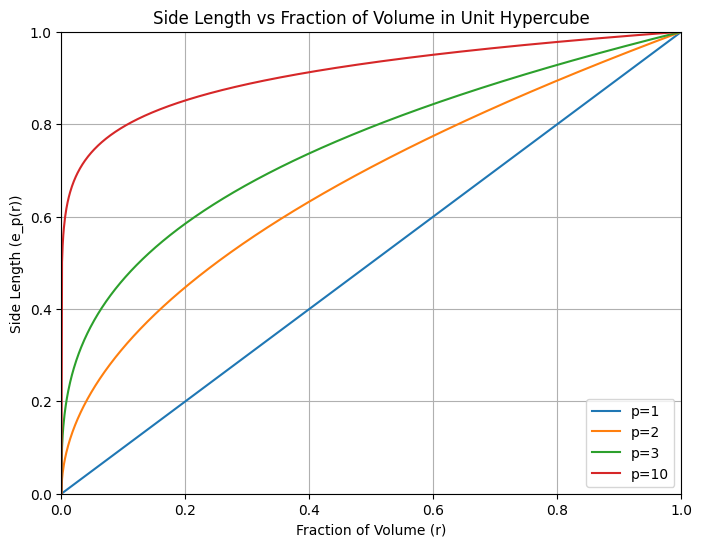

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fractions of the volume
r = np.linspace(0, 1, 1000)

# Dimensions to consider
dimensions = [1, 2, 3, 10]

plt.figure(figsize=(8, 6))

for p in dimensions:
    # Compute the side length e_p(r)
    e_p = r**(1/p)
    plt.plot(r, e_p, label=f'p={p}')

plt.title("Side Length vs Fraction of Volume in Unit Hypercube")
plt.xlabel("Fraction of Volume (r)")
plt.ylabel("Side Length (e_p(r))")
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


* The plot shows that, as the dimension $p$ increases, the side length $e_p(r) $approaches 1 even for small fractions $r$ of the volume.
This demonstrates that, in high dimensions the side length must be large to be able to capture even a small fraction of the volume,

### **Figure 2.7 : Nearest Neighbor Distances in High Dimensions**

As the number of dimensions increases, the difference between the distances to the nearest and farthest neighbors reduces relatively to the nearest neighbor distance. Essentially, all points become nearly equidistant from each other.

The ratio of distances :  $(Dmax−Dmin)/Dmin$​ decreases as dimensionality increases which indicates that the spread of distances shrinks in high-dimensional spaces.


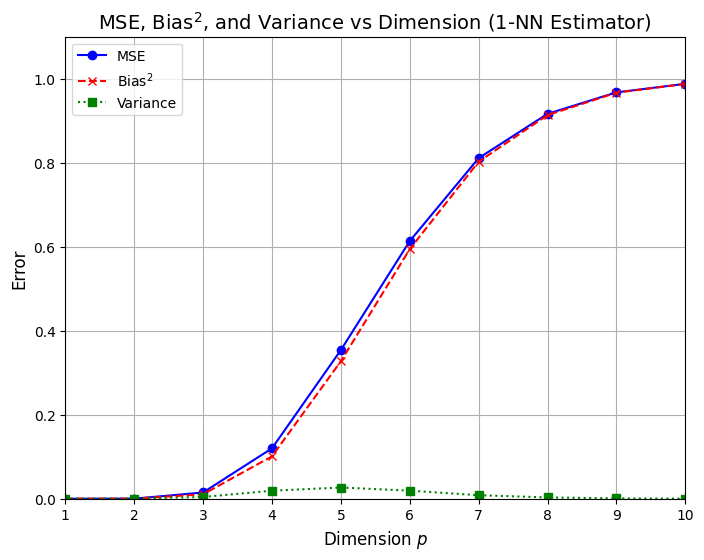

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000
dimensions = np.arange(1, 11)
num_simulations = 5000  # Increased for better results

# True function
def f(x):
    return np.exp(-8 * np.sum(x**2, axis=1))

# Initialize lists to store results
MSE_list = []
Bias_sq_list = []
Variance_list = []

for p in dimensions:
    # True value at x0
    x0 = np.zeros((1, p))
    f_x0 = f(x0)[0]

    predictions = np.zeros(num_simulations)

    for i in range(num_simulations):
        # Generate training data
        X_train = np.random.uniform(-1, 1, (N, p))
        y_train = f(X_train)
        # Compute distances to x0
        distances = np.linalg.norm(X_train - x0, axis=1)
        # Find index of nearest neighbor
        idx_nn = np.argmin(distances)
        # Prediction is the value at nearest neighbor
        y_pred = y_train[idx_nn]
        predictions[i] = y_pred

    # Compute bias and variance
    bias = np.mean(predictions) - f_x0
    variance = np.var(predictions)
    MSE = bias**2 + variance

    # Store results
    MSE_list.append(MSE)
    Bias_sq_list.append(bias**2)
    Variance_list.append(variance)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(dimensions, MSE_list, label='MSE', linestyle='-', color='blue', marker='o')
plt.plot(dimensions, Bias_sq_list, label='Bias$^2$', linestyle='--', color='red', marker='x')
plt.plot(dimensions, Variance_list, label='Variance', linestyle=':', color='green', marker='s')

plt.title('MSE, Bias$^2$, and Variance vs Dimension (1-NN Estimator)', fontsize=14)
plt.xlabel('Dimension $p$', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(1, 10)
plt.ylim(0, 1.1)
plt.show()


In high-dimensional spaces, the concept of "closeness" loses its meaning under traditional distance measures. This necessitates the use of alternative approaches or the incorporation of dimensionality reduction techniques when dealing with high-dimensional datasets.

### **Figure 2.8 : 3. Concentration of Distances**


In high-dimensional spaces, the relative variability of distances between random points decreases. Distances tend to concentrate around their mean value leading to a phenomenon known as the "concentration of measure."

The coefficient of variation (standard deviation divided by the mean) of distances decreases as dimensionality increases, indicating that distances become more uniform.

**Challenges :**   

* With distances concentrating, it becomes challenging to distinguish between different data points based only on distance.
* Algorithms that rely only on distance metrics may struggle to find meaningful patterns or clusters which can potentially lead to worse performance.


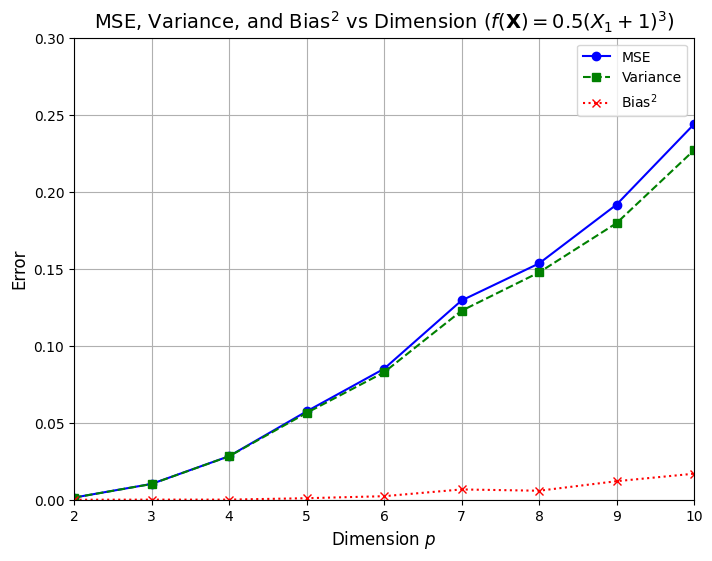

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
N = 1000                      # Number of training samples
dimensions = np.arange(2, 11) # Dimensions from 2 to 10 (start from 2 to match your data points)
num_simulations = 1000        # Number of simulations for estimation

# True function depends only on x1
def f(X1):
    return 0.5 * (X1 + 1) ** 3

# True value at x0 (x1 = 0)
f_x0_value = f(0)

# Initialize lists to store results
MSE_list = []
Variance_list = []
Bias_sq_list = []

for p in dimensions:
    predictions = np.zeros(num_simulations)

    for i in range(num_simulations):
        #Generate training data in p dimensions
        X_train = np.random.uniform(-1, 1, (N, p))

        # Query point x0
        x0 = np.zeros(p)

        # Compute Euclidean distances from x0
        distances = np.linalg.norm(X_train - x0, axis=1)

        # Find the index of the nearest neighbor
        idx_nn = np.argmin(distances)

        # Nearest neighbor's x1 value
        x1_nn = X_train[idx_nn, 0]

        # Prediction using the true function (no noise)
        y_pred = f(x1_nn)

        # Store the prediction
        predictions[i] = y_pred

    # Compute bias and variance
    bias = np.mean(predictions) - f_x0_value
    variance = np.var(predictions)
    MSE = bias ** 2 + variance

    # Store results
    MSE_list.append(MSE)
    Variance_list.append(variance)
    Bias_sq_list.append(bias ** 2)

#Convert lists to numpy arrays
MSE_array = np.array(MSE_list)
Variance_array = np.array(Variance_list)
Bias_sq_array = np.array(Bias_sq_list)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(dimensions, MSE_array, label='MSE', linestyle='-', color='blue', marker='o')
plt.plot(dimensions, Variance_array, label='Variance', linestyle='--', color='green', marker='s')
plt.plot(dimensions, Bias_sq_array, label='Bias$^2$', linestyle=':', color='red', marker='x')

plt.title('MSE, Variance, and Bias$^2$ vs Dimension ($f(\mathbf{X}) = 0.5(X_1 + 1)^3$)', fontsize=14)
plt.xlabel('Dimension $p$', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(2, 10)
plt.ylim(0, 0.3)
plt.show()


**Conclusion :**  high-dimensional spaces shows properties where distances lose their discriminative power due to concentration

### **Figure 2.9 : Expected Prediction Error Ratio of 1-NN to Least Squares**

We compare the expected prediction error (EPE) of 1-nearest neighbor to that of ordinary least squares (OLS) regression as the dimension increases when the true function is linear (1) and when it's cubic (2).

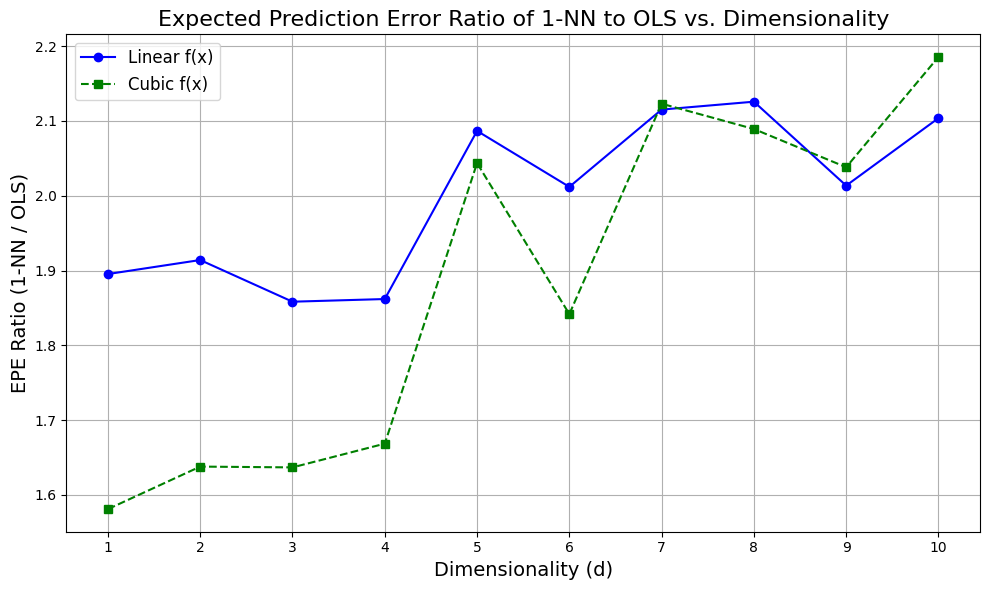

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Simulation parameters
np.random.seed(42)
N = 500  # Sample size
dims = range(1, 11)  # Dimensionality from 1 to 10
noise_std = 1  # Standard deviation of noise
num_simulations = 10  # Number of simulations per dimension

# Define target functions
def linear_function(X):
    return X[:, 0]

def cubic_function(X):
    return 0.5 * (X[:, 0] + 1) ** 3

# Storage for EPE ratios (averaged over simulations)
ratios_linear = []
ratios_cubic = []

# Run simulations for each dimension
for d in dims:
    ratios_linear_d = []
    ratios_cubic_d = []

    for sim in range(num_simulations):
        # Generate data
        X = np.random.uniform(-1, 1, (N, d))
        noise = np.random.normal(0, noise_std, N)

        # Define targets for linear and cubic cases
        y_linear = linear_function(X) + noise
        y_cubic = cubic_function(X) + noise

        # Split into training and testing sets
        X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
            X, y_linear, test_size=0.3, random_state=sim
        )
        X_train_cubic, X_test_cubic, y_train_cubic, y_test_cubic = train_test_split(
            X, y_cubic, test_size=0.3, random_state=sim
        )

        # ------------------------------------------
        # Ordinary Least Squares (OLS) Regression
        # --------------------------------------------
        ols_model_linear = LinearRegression()
        ols_model_linear.fit(X_train_linear, y_train_linear)
        y_pred_ols_linear = ols_model_linear.predict(X_test_linear)

        ols_model_cubic = LinearRegression()
        ols_model_cubic.fit(X_train_cubic, y_train_cubic)
        y_pred_ols_cubic = ols_model_cubic.predict(X_test_cubic)

        # -----------------------------------------
        # 1-Nearest Neighbor (1-NN) Regression
        # -----------------------------------------
        knn_model_linear = KNeighborsRegressor(n_neighbors=1)
        knn_model_linear.fit(X_train_linear, y_train_linear)
        y_pred_knn_linear = knn_model_linear.predict(X_test_linear)

        knn_model_cubic = KNeighborsRegressor(n_neighbors=1)
        knn_model_cubic.fit(X_train_cubic, y_train_cubic)
        y_pred_knn_cubic = knn_model_cubic.predict(X_test_cubic)

        # ----------------------------------------
        # Calculate Mean Squared Errors (MSE)
        # ----------------------------------------
        mse_ols_linear = mean_squared_error(y_test_linear, y_pred_ols_linear)
        mse_knn_linear = mean_squared_error(y_test_linear, y_pred_knn_linear)

        mse_ols_cubic = mean_squared_error(y_test_cubic, y_pred_ols_cubic)
        mse_knn_cubic = mean_squared_error(y_test_cubic, y_pred_knn_cubic)

        # ---------------------------------------
        # Compute EPE Ratios and Store
        # ----------------------------------------
        ratio_linear = mse_knn_linear / mse_ols_linear
        ratio_cubic = mse_knn_cubic / mse_ols_cubic

        ratios_linear_d.append(ratio_linear)
        ratios_cubic_d.append(ratio_cubic)

    # Average the ratios over simulations for current dimension
    avg_ratio_linear = np.mean(ratios_linear_d)
    avg_ratio_cubic = np.mean(ratios_cubic_d)

    ratios_linear.append(avg_ratio_linear)
    ratios_cubic.append(avg_ratio_cubic)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dims, ratios_linear, marker='o', linestyle='-', color='blue', label='Linear f(x)')
plt.plot(dims, ratios_cubic, marker='s', linestyle='--', color='green', label='Cubic f(x)')
plt.xlabel('Dimensionality (d)', fontsize=14)
plt.ylabel('EPE Ratio (1-NN / OLS)', fontsize=14)
plt.title('Expected Prediction Error Ratio of 1-NN to OLS vs. Dimensionality', fontsize=16)
plt.xticks(dims)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


----------------
--------------------
--------------------

## Exercise 3 - [15%]

**a)** The rule of thumb for **train/test split** ratio is to choose it to be quite larger than 1 (e.g a 75%-25% train/test split). Validate empirically this choice:

* Choose a dataset for a classification task.
* Use a classification method that is suitable for the problem (i.e. performs reasonably well on the dataset).
* Try several train/test split ratio values (e.g. 0% to 100% with step 5%).
* Use plot(s) to display the performance of the method on the test set in each case.
* Justify in detail the observed behavior using arguments founded in the theory (see bias-variance trade off).
* What is (approx.) the best choice of ratio in your case?
* Now, using a train/validation/test split, optimize the hyperparameters of your model, and give the final trained model that you would deliver for practical use.

**b)** *Cross-validation* splits the set of data in non-overlapping parts, then learns and tests the performance of a method independently in the different parts of the data, e.g. i) train-test set split, or ii) k-folded approach.

Imagine that you have to apply (i) and (ii) for validating a regression method for time-series, a task which is also referred as *time-series forecasting*. Note that in this case the element of time should be respected.

Describe a procedure, by giving a pseudocode, that would apply (i) and (ii).



# **Resolution of Exercice 3 :**
### **Part (a): Train/Test Split Ratio**
**Steps:**

1.   **Choose a Dataset:**

We will use a popular "*Iris dataset*" for classification, which involves predicting the species of iris flowers based on measurements of sepal and petal dimensions.

**Iris Dataset:**  

"This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width."

Source : https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

2.   **Classification Method:**

  ### **Method 1 : k-Nearest Neighbors (k-NN) classifier**

  ### **Method 2 : Random Forest Classifier**
I chose these two models because they handle multi-class classification and perform reasonably well on the Iris dataset.

3.   **Train/Test Split Ratios:**
        We'll try different train/test split ratios ranging from 0% to 100% with a step of 5%.

4.   **Plot the Performance:**
        We will plot the classification accuracy for different train/test splits on the test set.

**Method 1 : K-NN Classifier**

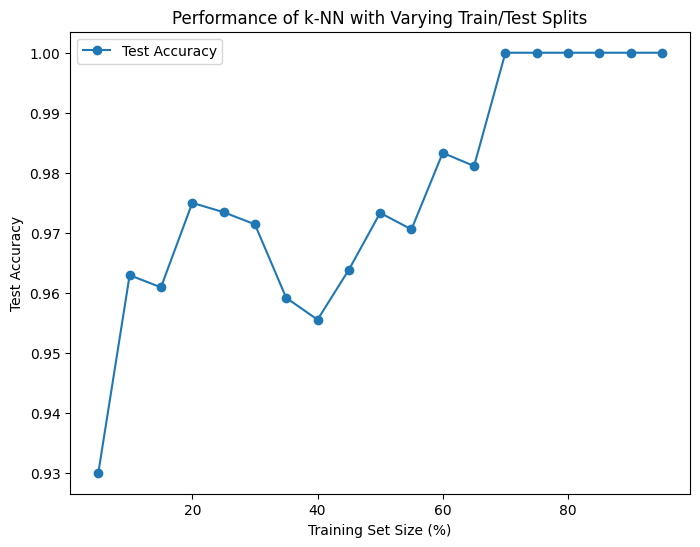

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset from sklearn
data = load_iris()
X, y = data.data, data.target

# Train/test split ratios (from 5% to 95% with 5% step)
split_ratios = np.arange(0.05, 1.00, 0.05)  #remove 1.0 from the ratios
test_accuracies = []

# Train and evaluate the classifier for each split ratio
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Test performance
    y_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(split_ratios * 100, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Test Accuracy')
plt.title('Performance of k-NN with Variation of Train/Test Splits')
plt.legend()
plt.show()


**Method 2 : Random forest Classifier VS k-NN**

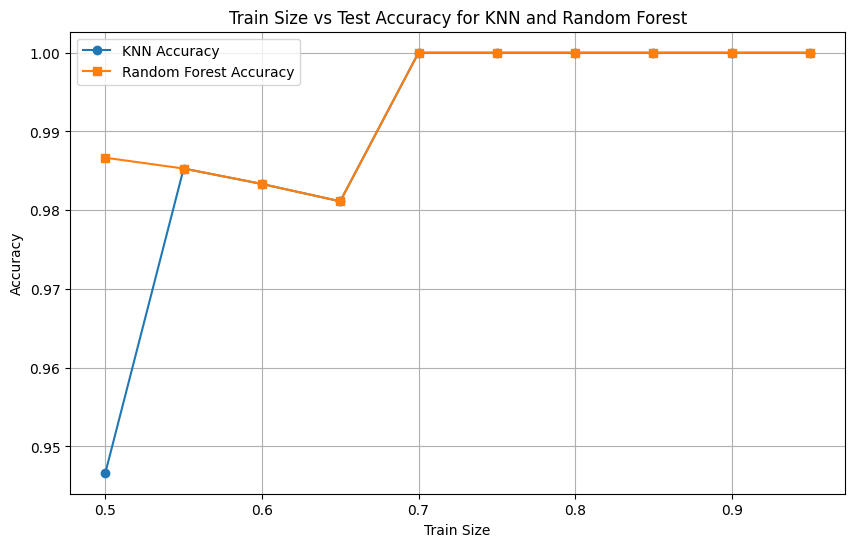

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Classifiers: KNN and Random Forest
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Test sizes to try
test_sizes = np.arange(0.05, 0.55, 0.05)  # From 5% to 50% test size
train_sizes = 1 - test_sizes  # Corresponding train sizes

# To store accuracy scores
knn_accuracies = []
rf_accuracies = []

# Iterate over different test sizes
for test_size in test_sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train and evaluate KNN
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    knn_acc = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_acc)

    # Train and evaluate Random Forest
    rf.fit(X_train, y_train)
    rf_predictions = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_predictions)
    rf_accuracies.append(rf_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, knn_accuracies, label='KNN Accuracy', marker='o')
plt.plot(train_sizes, rf_accuracies, label='Random Forest Accuracy', marker='s')

plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Train Size vs Test Accuracy for KNN and Random Forest')
plt.legend()
plt.grid(True)
plt.show()


 **1. Justify in detail the observed behavior using arguments founded in the theory (see bias-variance trade off).**
* **Bias** results from incorrect assumptions in the model, leading to underfitting and failure to capture important relationships.
* **Variance** is the model’s sensitivity to the specific training data, causing it to overfit and perform poorly on new, unseen data.
The tradeoff involves finding a balance between bias and variance:

* **Large training set:** Leads to low bias since the model learns from more data, but may introduce high variance because the model "overfits" the training data.

* **Small training set:** Leads to high bias because the model doesn’t learn enough (underfitting), but lower variance since it may generalize more poorly but not overfit.
  
Source : https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
  
In simple terms, here's what happens with the two models:

**KNN Classifier**:
- **underfitting** (high bias, low variance) : When we have a small amount of training data, KNN struggles to make accurate predictions because it doesn't have enough information to rely on.

- **overfitting** (high variance)As you add more data, KNN starts to do better, but eventually, with too much data, it becomes overly sensitive to small changes in the training set.

**Random Forest Classifier**:
- Random Forest combines many decision trees to make predictions, so it's more stable and less likely to overfit compared to KNN.
- With small amounts of data, Random Forest may **underfit** too (high bias), but as we add more data, it improves and avoids overfitting better than KNN, because the averaging of trees keeps its predictions more stable (low variance). This makes it more reliable, even with larger datasets.


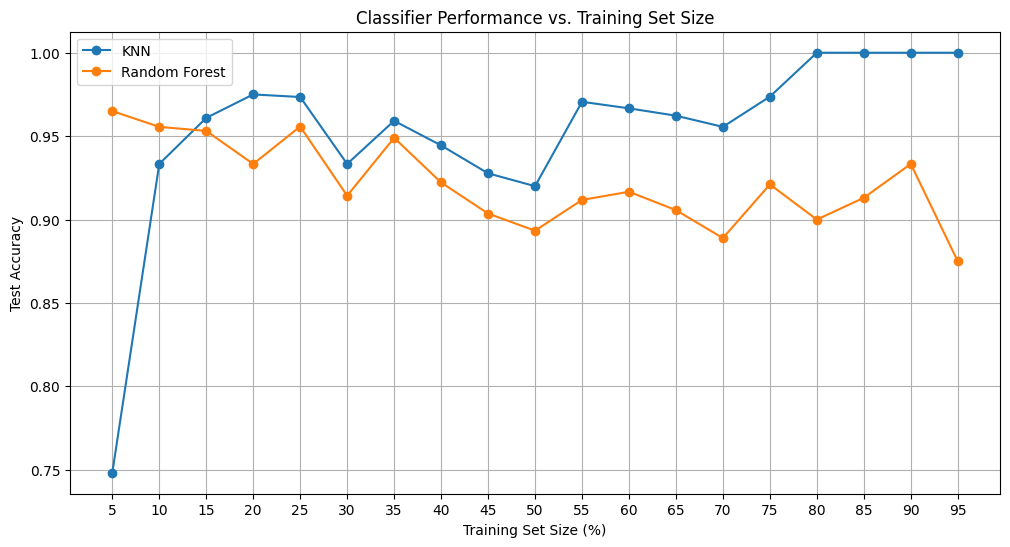

Optimal Train/Test Split Ratio: 75%-25%

Training set size: 90 samples
Validation set size: 30 samples
Test set size: 30 samples

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Final Model Test Accuracy: 0.90

Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Define classification methods
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 3. Define train/test split ratios (5% to 95% with step of 5%)
split_ratios = np.arange(0.05, 1.00, 0.05)
split_percentages = (split_ratios * 100).astype(int)

# Initialize dictionaries to store accuracies
accuracies = {name: [] for name in classifiers.keys()}

# 4. Iterate over different split ratios and evaluate classifiers
for ratio in split_ratios:
    for name, clf in classifiers.items():
        # Split the data while preserving the class distribution
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=ratio, random_state=42, stratify=y)

        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies[name].append(acc)

# 5. Plot the results
plt.figure(figsize=(12, 6))
for name in classifiers.keys():
    plt.plot(split_percentages, accuracies[name], marker='o', label=name)
plt.xlabel('Training Set Size (%)')
plt.ylabel('Test Accuracy')
plt.title('Classifier Performance vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.xticks(split_percentages)
plt.show()

# 6. Analyze the Bias-Variance Trade-off
# (This will be discussed in the textual explanation below)

# 7. Determine the Optimal Split Ratio
# Let's assume based on the plot that around 70%-80% training size provides a good balance
optimal_train_size = 0.75  # 75%
optimal_test_size = 0.25   # 25%
print(f"Optimal Train/Test Split Ratio: {int(optimal_train_size*100)}%-{int(optimal_test_size*100)}%")

# 8. Hyperparameter Optimization and Final Model Training
# Split the data into Train, Validation, and Test sets
train_val_ratio = 0.80  # 80% for training + validation
test_ratio = 0.20        # 20% for testing

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, train_size=train_val_ratio, random_state=42, stratify=y)

# Further split Train+Validation into Training and Validation sets
validation_ratio = 0.25  # 25% of Train+Val -> 20% of total
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, train_size=0.75, random_state=42, stratify=y_train_val)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Choose the best classifier based on previous accuracy (Assume Random Forest performed better)
best_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with validation set
grid_search = GridSearchCV(
    estimator=best_clf,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV on the training set
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters: {best_params}")

# Train the final model with best hyperparameters on Train + Validation sets
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

final_model.fit(X_train_val, y_train_val)

# Evaluate the final model on the Test set
y_test_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Model Test Accuracy: {final_accuracy:.2f}")

# Optional: Detailed classification report
from sklearn.metrics import classification_report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=target_names))


### **Part b) Cross-Validation for Time-Series Forecasting**

When dealing with time-series data, it's important to respect the time-order of the data. This means we can't just randomly split the data as we do with standard datasets because it would break the temporal relationship.
Procedure for Time-Series Validation:


*  **Train-Test Split (i):**

In time-series forecasting, the split should be chronological. For example, use the first 70% of the data for training and the remaining 30% for testing. This ensures that the model is trained on past data and tested on future data.


*   **Time-Series K-Fold (ii):**
      
A k-fold approach for time-series data is often referred to as "TimeSeriesSplit" in scikit-learn. It involves splitting the data chronologically into k parts and using the first parts for training and the remaining part for testing.


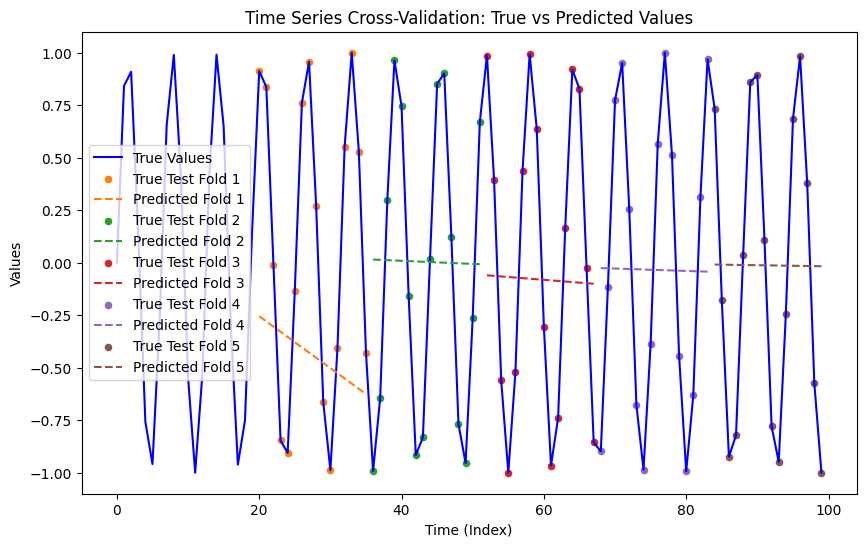

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

# Sample time-series data
time_series_X = np.arange(100).reshape(-1, 1)
time_series_y = np.sin(time_series_X).ravel()

# TimeSeriesSplit with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Plot setup
plt.figure(figsize=(10, 6))
plt.plot(time_series_X, time_series_y, color='blue', label='True Values')

# Train and test using TimeSeriesSplit
fold = 1
for train_index, test_index in tscv.split(time_series_X):
    X_train, X_test = time_series_X[train_index], time_series_X[test_index]
    y_train, y_test = time_series_y[train_index], time_series_y[test_index]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot test set predictions
    plt.scatter(X_test, y_test, color=f'C{fold}', label=f'True Test Fold {fold}', s=20)
    plt.plot(X_test, y_pred, color=f'C{fold}', linestyle='--', label=f'Predicted Fold {fold}')

    fold += 1

# Formatting the plot
plt.title('Time Series Cross-Validation: True vs Predicted Values')
plt.xlabel('Time (Index)')
plt.ylabel('Values')
plt.legend()
plt.show()


For this example, we'll use the "Airline Passengers" dataset https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

First 5 rows of the dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


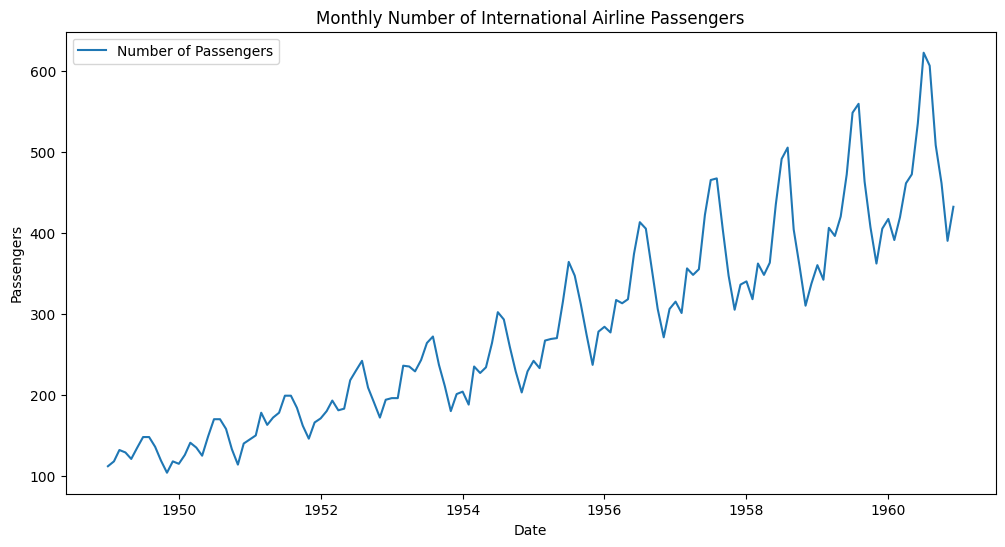


Data with lag features:
            Passengers  lag_1  lag_2  lag_3
Month                                      
1949-04-01         129  132.0  118.0  112.0
1949-05-01         121  129.0  132.0  118.0
1949-06-01         135  121.0  129.0  132.0
1949-07-01         148  135.0  121.0  129.0
1949-08-01         148  148.0  135.0  121.0

Training set size: 112 samples
Testing set size: 29 samples

--- Train-Test Split Evaluation ---
Mean Absolute Error (MAE): 58.35
Root Mean Squared Error (RMSE): 76.24


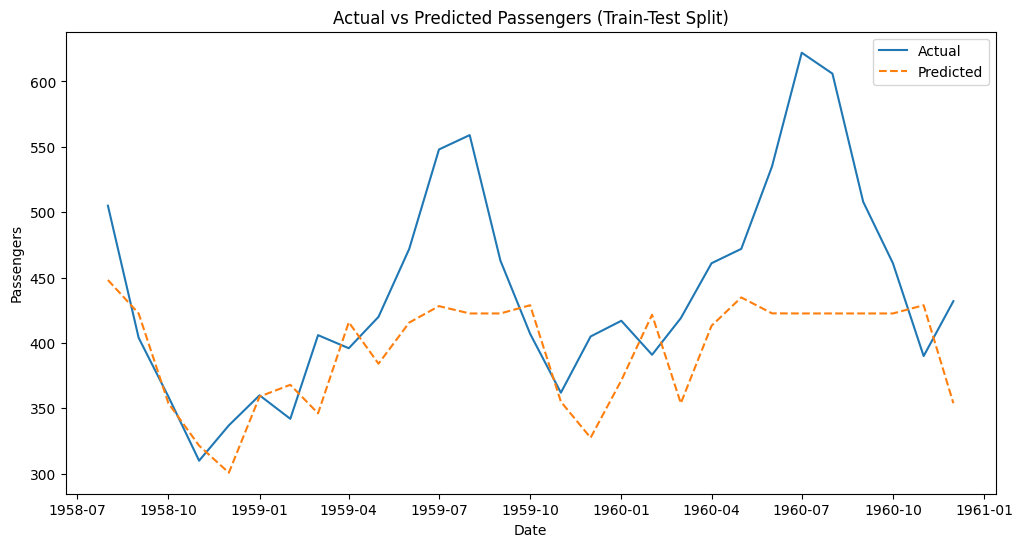


--- Time-Series Cross-Validation (5-Fold) ---
Fold 1: MAE = 47.06, RMSE = 53.06
Fold 2: MAE = 29.76, RMSE = 38.71
Fold 3: MAE = 58.08, RMSE = 71.13
Fold 4: MAE = 43.62, RMSE = 57.47
Fold 5: MAE = 66.85, RMSE = 84.84

Average MAE over 5 folds: 49.07
Average RMSE over 5 folds: 61.04

--- Hyperparameter Optimization ---
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best MAE Score: 46.49

Final model trained on the entire dataset.


In [51]:
# Note : This code is corrected and enhanced with chatgpt4.0, o1-preview and a gpt Data Scientist and Analyst Assistant
# for answering questions and giving explanations

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# -------------------------------------
# 1. Data Loading and Preprocessing
# -------------------------------------
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df, label='Number of Passengers')
plt.title('Monthly Number of International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Create lag features
# We'll use the past 3 months to predict the next month's passengers
def create_lag_features(data, lags=3):
    df_lag = data.copy()
    for lag in range(1, lags + 1):
        df_lag[f'lag_{lag}'] = df_lag['Passengers'].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

df_lag = create_lag_features(df, lags=3)

# Features and target
X = df_lag[['lag_1', 'lag_2', 'lag_3']]
y = df_lag['Passengers']

# Display the transformed data
print("\nData with lag features:")
print(df_lag.head())

# 2. Train-Test Split
# ---------------------

# Define the split ratio
train_size = 0.8  # 80% for training, 20% for testing

# Determine the split index
split_index = int(len(df_lag) * train_size)

# Split the data
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Initialize the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n--- Train-Test Split Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Passengers (Train-Test Split)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# 3. Time-Series Cross-Validation (k-Fold)
# -----------------------------------------

# Define the number of splits (folds)
n_splits = 5

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store evaluation metrics
mae_scores = []
rmse_scores = []

# Initialize fold counter
fold = 1

print(f"\n--- Time-Series Cross-Validation ({n_splits}-Fold) ---")

for train_index, val_index in tscv.split(X):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Initialize and train the model
    model_cv = RandomForestRegressor(n_estimators=100, random_state=42)
    model_cv.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    y_val_pred = model_cv.predict(X_val_cv)

    # Calculate evaluation metrics
    mae_cv = mean_absolute_error(y_val_cv, y_val_pred)
    rmse_cv = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))

    # Store the metrics
    mae_scores.append(mae_cv)
    rmse_scores.append(rmse_cv)

    print(f"Fold {fold}: MAE = {mae_cv:.2f}, RMSE = {rmse_cv:.2f}")
    fold += 1

# Calculate average metrics
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)

print(f"\nAverage MAE over {n_splits} folds: {avg_mae:.2f}")
print(f"Average RMSE over {n_splits} folds: {avg_rmse:.2f}")

# 4. Hyperparameter Optimization (Optional)
# -------------------------------------------

# To further optimize the model, we can perform GridSearchCV within a time-series split

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV with TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"\n--- Hyperparameter Optimization ---")
print(f"Best Parameters: {best_params}")
print(f"Best MAE Score: {best_score:.2f}")

# 5. Final Model Training (Optional)
# ------------------------------------

# Train the final model on the entire dataset using the best parameters
final_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

final_model.fit(X, y)

# Optionally, save the model using joblib or pickle for deployment
# import joblib
# joblib.dump(final_model, 'final_time_series_model.pkl')

print("\nFinal model trained on the entire dataset.")

# Example: Make a prediction for the next month (assuming you have the latest 3 months data)
# latest_data = df_lag[['lag_1', 'lag_2', 'lag_3']].iloc[-1].values.reshape(1, -1)
# next_month_prediction = final_model.predict(latest_data)
# print(f"Predicted number of passengers for next month: {next_month_prediction[0]:.2f}")


First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


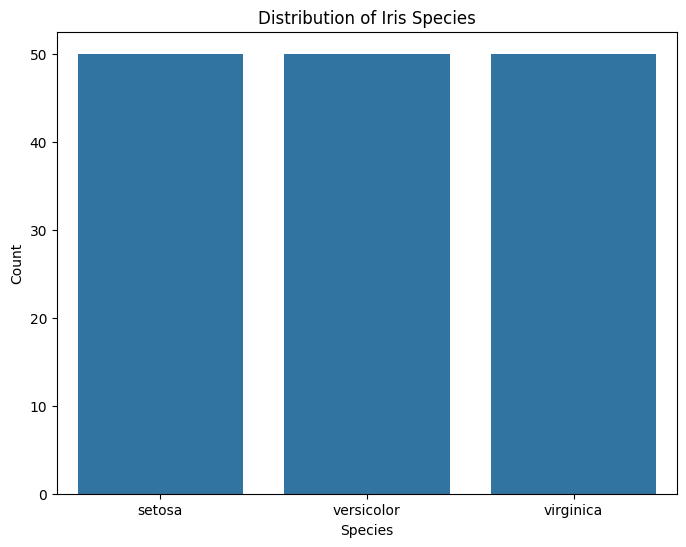

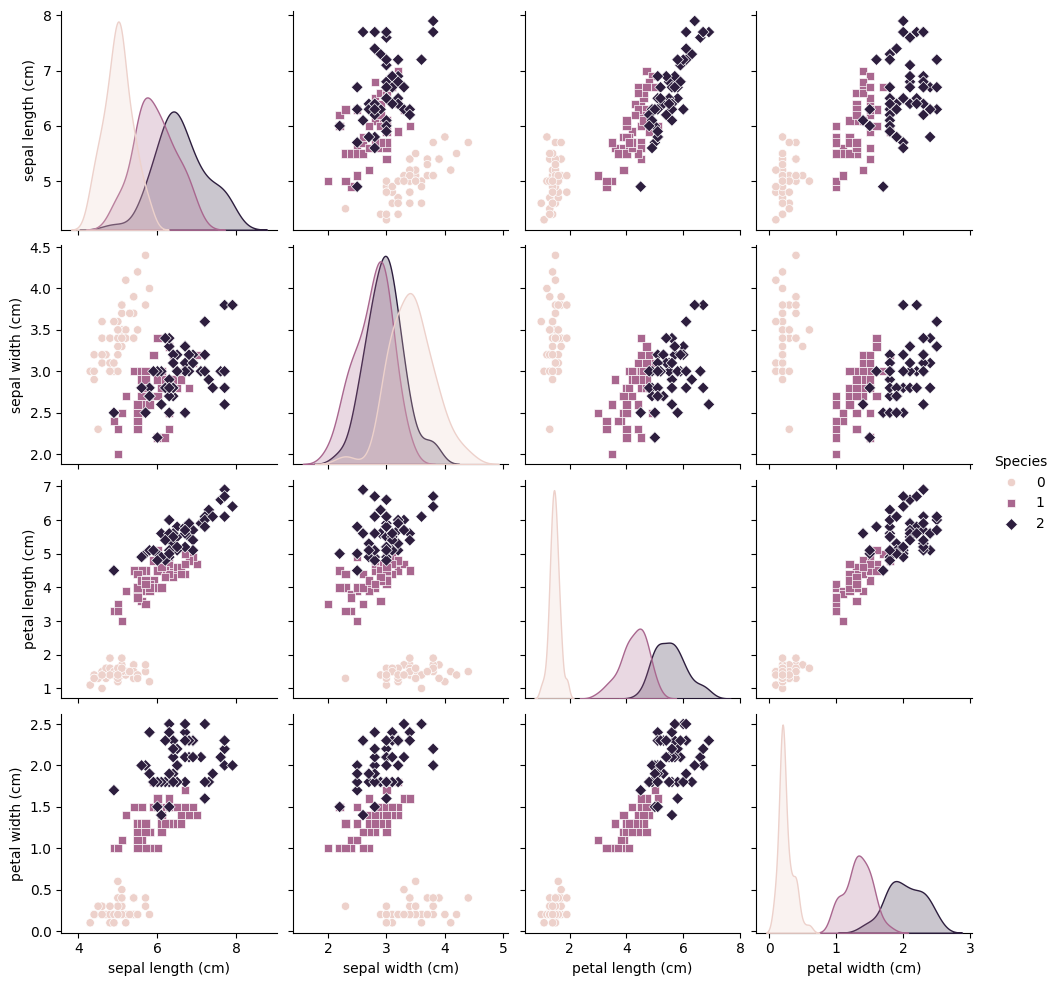

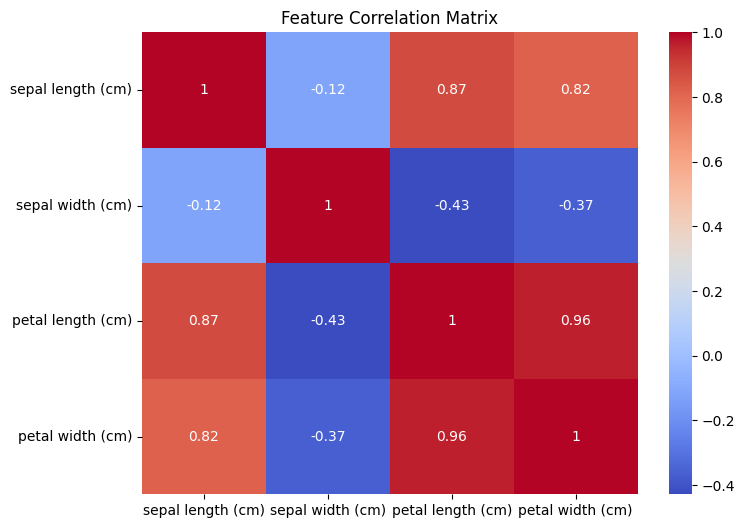


Training set size: 120 samples
Testing set size: 30 samples

--- Train-Test Split Evaluation ---
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



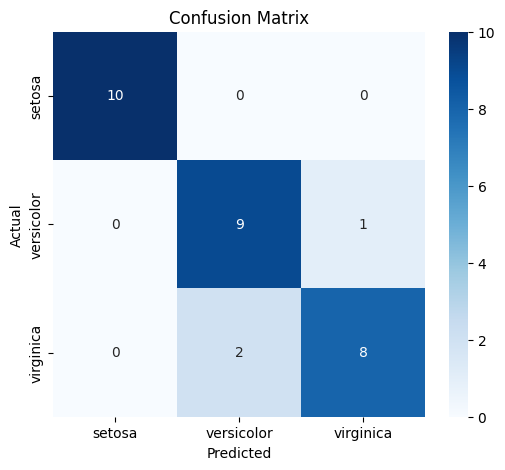


--- Stratified 5-Fold Cross-Validation ---
Fold 1: Accuracy = 0.97, Precision = 0.97, Recall = 0.97, F1-Score = 0.97
Fold 2: Accuracy = 0.97, Precision = 0.97, Recall = 0.97, F1-Score = 0.97
Fold 3: Accuracy = 0.93, Precision = 0.94, Recall = 0.93, F1-Score = 0.93
Fold 4: Accuracy = 0.97, Precision = 0.97, Recall = 0.97, F1-Score = 0.97
Fold 5: Accuracy = 0.90, Precision = 0.90, Recall = 0.90, F1-Score = 0.90

Average Accuracy over 5 folds: 0.95
Average Precision over 5 folds: 0.95
Average Recall over 5 folds: 0.95
Average F1-Score over 5 folds: 0.95

--- Hyperparameter Optimization ---
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.97

--- Final Model Evaluation on Test Set ---
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.

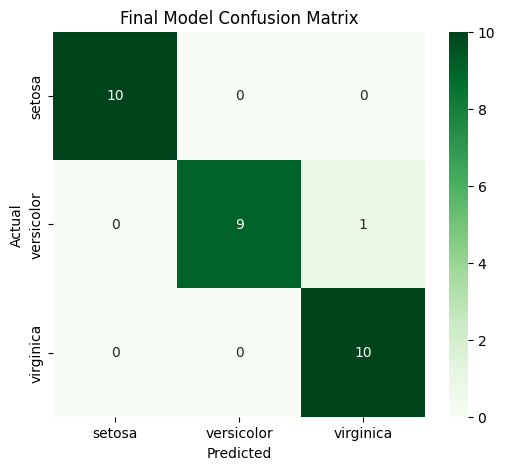

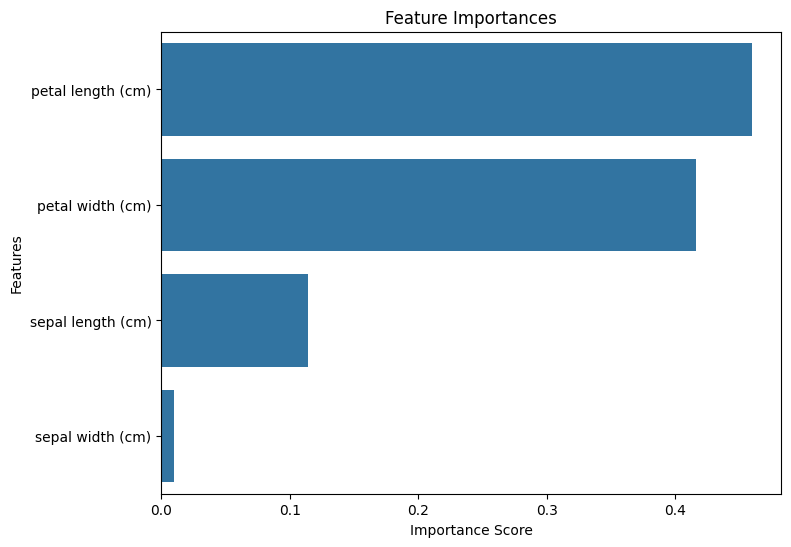


Final model trained and ready for deployment.


In [67]:
#This code is based on the previous one

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# -------------------------------------
# 1. Data Loading and Preprocessing
# -------------------------------------

# Load the Iris dataset from sklearn
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['Species'] = y

# Display the first few rows
print("First 5 rows of the Iris dataset:")
print(df.head())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=target_names)
plt.show()

# Optional: Exploratory Data Analysis (EDA)
# Pairplot to visualize feature relationships
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

# Correlation Matrix
corr_matrix = df[feature_names].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# -------------------------------------
# 2. Train-Test Split
# -------------------------------------

# Define the split ratio
train_size = 0.8  # 80% for training, 20% for testing

# Split the data with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Initialize the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Train-Test Split Evaluation ---")
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# -------------------------------------
# 3. k-Fold Cross-Validation
# -------------------------------------

# Define the number of splits (folds)
n_splits = 5

# Initialize StratifiedKFold to maintain class distribution in each fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print(f"\n--- Stratified {n_splits}-Fold Cross-Validation ---")

fold = 1
for train_index, val_index in skf.split(X, y):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    # Initialize and train the model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_cv, y_train_cv)

    # Make predictions on the validation set
    y_val_pred = clf.predict(X_val_cv)

    # Calculate evaluation metrics
    acc = accuracy_score(y_val_cv, y_val_pred)
    precision = precision_score(y_val_cv, y_val_pred, average='macro')
    recall = recall_score(y_val_cv, y_val_pred, average='macro')
    f1 = f1_score(y_val_cv, y_val_pred, average='macro')

    # Store the metrics
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Fold {fold}: Accuracy = {acc:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1-Score = {f1:.2f}")
    fold += 1

# Calculate average metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"\nAverage Accuracy over {n_splits} folds: {avg_accuracy:.2f}")
print(f"Average Precision over {n_splits} folds: {avg_precision:.2f}")
print(f"Average Recall over {n_splits} folds: {avg_recall:.2f}")
print(f"Average F1-Score over {n_splits} folds: {avg_f1:.2f}")

# -------------------------------------
# 4. Hyperparameter Optimization
# -------------------------------------

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV on the entire training set
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\n--- Hyperparameter Optimization ---")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")

# -------------------------------------
# 5. Final Model Training
# -------------------------------------

# Train the final model with the best hyperparameters on the combined training and validation sets
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"\n--- Final Model Evaluation on Test Set ---")
print(f"Accuracy: {final_accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_final_pred, target_names=target_names))

# Confusion Matrix for Final Model
conf_matrix_final = confusion_matrix(y_test, y_final_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Final Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Feature Importance
feature_importances = final_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Optionally, save the final model using joblib or pickle for deployment
# import joblib
# joblib.dump(final_model, 'final_iris_model.pkl')

print("\nFinal model trained and ready for deployment.")


-----------
## References

1. **Scikit-Learn Documentation**:
   - Pedregosa, F., et al. (2011). "Scikit-learn: Machine Learning in Python." *Journal of Machine Learning Research*, 12, pp. 2825-2830.
   - [Scikit-Learn User Guide - Model Evaluation](https://scikit-learn.org/stable/model_selection.html#model-evaluation)

2. **Time Series Analysis**:
   - Hyndman, R.J., & Athanasopoulos, G. (2018). *Forecasting: Principles and Practice*. 2nd edition. OTexts. Available at: https://otexts.com/fpp2/ - Covers principles of time-series forecasting and the importance of chronological data handling.
   - Shumway, R.H., & Stoffer, D.S. (2017). *Time Series Analysis and Its Applications: With R Examples*. Springer. -a.

3. **Bias-Variance Trade-Off**:
   - Geman, S., Bienenstock, E., & Doursat, R. (1992). "Neural Networks and the Bias/Variance Dilemma." *Neural Computation*, 4(1), pp. 1-58.
   
4. **Cross-Validation for Time Series**:
   - Bergmeir, C., & Benítez, J.M. (2012). "On the Use of Cross-Validation for Time Series Predictor Evaluation." *Information Sciences*, 191, pp. 192-213.



-------------
---------------
---------------

## Exercise 4 - [20%]

The purpose of this exercise is to apply classification for two data classes using a **simple linear model**. However, the particularity is that we are in the context of *stream processing* where data arrive sequentially in pairs of observations, containing one observation from each class, i.e. each time $t$ we observe $(x_t \in \text{class A}, x'_t \in \text{class B})$. As *we cannot store all the data* to apply batch processing, we need to develop a frugal online learning approach that would require as little as possible stored information at each time $t$ for a simple linear model $model_t$, which then would be updated based on the incoming $(x_t, x'_t)$'s. At any time $t$ the model $model_t$ should be able to classify uknown data.

**a)** Analyze in detail the requirements of this problem setting, and implement an approach to produce a linear model for all the data of the stream. Explain why it is correct and how much memory resources it would need to run.

**b)** To train your model consider $N = n+n$ data produced two 2D Gaussian distributions ($n$ instances from each of them) that have (e.g.) same standard deviation and different mean values $\mu_1$ and $\mu_2$. Use a large $N$ (e.g. $500$) and show the performance of $model_t$ at the course of time (i.e. for $t=1,...,N$) using a test-set of $500 + 500$ datapoints generated from the same distributions. Compare in the same plot (e.g. it would appear as fixed horizontal line) against a linear classifier that is trained directly on the $N$ datapoints. Use a couple of $\mu_1$ and $\mu_2$ pairs to show an easy case and a more difficult one.



# Resolution of Exercice 4 :

### **Part (a): Problem Analysis and Implementation**

#### **I. Problem Analysis**

The aim of this exercice is to develop a **linear classification model** applied for two data classes ( Class A and Class B) in a **streaming processing context**.

  1. **Sequential Data Arrival**: Data arrives sequentially in pairs of observation : one from **class A** and one from **class B**.
    - For each time $t$, we get a pair $(x_t, x'_t)$ , where $x_t$ from Class A and $x'_t$ from Class B.
   
  2. **Limited Memory**: We cannot store all historical data due to the streaming nature. tha's why we need to update the model incrementally with minimal memory overhead.

  3. **Online Learning Approach**: The model should learn and adapt in real-time as new data arrives, updating the linear classifier $model_t$​ at each step $t$.
  4. **Real-time Classification**: At any time $t$, $model_t$​ should be capable of classifying unknown (new) data points accurately.

* The algorithm should maintain a minimal set of parameters necessary for the linear classifier and update them efficiently as new data arrives.

#### **II. Approach: Perceptron Algorithm for Online Linear Classification**

The **Perceptron algorithm** is suitable since it's a simple and effective linear classifier that updates its weights incrementally based on the current data point and its classification error ( it only requires storing the model weights and updating them iteratively ).


1. **Linear Model**: The Perceptron maintains a weight vector $w$ and a bias $b$ to define a linear decision boundary:
  *        **$prediction(x)=sign(w⋅x+b)$**

2. **Incremental Updates**: The Perceptron updates $w$ and $b$ only when an incoming data point is missclassified.

3. **Minimal Memory Usage**: The model only needs to store the weight vector $w$ and bias $b$, regardless of the number of data points processed.

4. **Efficiency**: Each update is computationally inexpensive, ensuring real-time performance in a streaming context.

#### **III. Implementation Steps :**
Initialization:

    - Initialize the weight vector w.
    - Initialize the bias b.

Processing Data Streams:

    - For each time step t, receive a pair of observations (xt ∈ Class A, xt' ∈ Class B).
    - Assign labels: yt = +1 for Class A and yt' = -1 for Class B.

Model Update:

    - For xt ∈ Class A:
        - Predict ŷt = sign(w ⋅ xt + b).
        - If ŷt ≠ yt, update:
            - w ← w + η ⋅ yt ⋅ xt
            - b ← b + η ⋅ yt
    - For xt' ∈ Class B:
        - Predict ŷt' = sign(w ⋅ xt' + b).
        - If ŷt' ≠ yt', update:
            - w ← w + η ⋅ yt' ⋅ xt'
            - b ← b + η ⋅ yt'

    Here, η is the learning rate.

Classification:

    - At any time t, classify unknown data points using the current w and b.


--- Experiment 1: μ1=[0 0], μ2=[5 5] ---


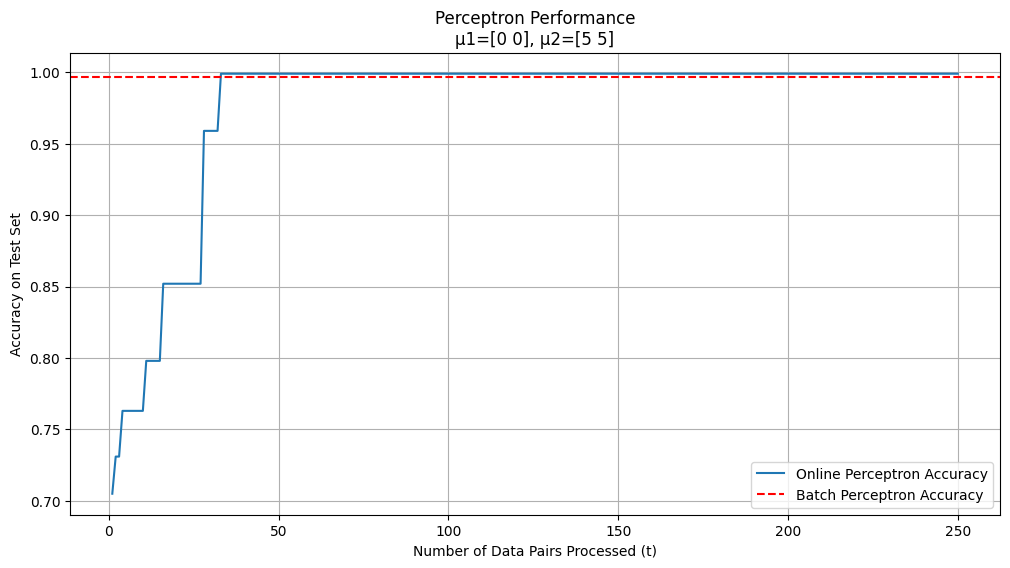

Final Online Perceptron Accuracy: 1.00
Batch Perceptron Accuracy: 1.00

--- Experiment 2: μ1=[0 0], μ2=[1 1] ---


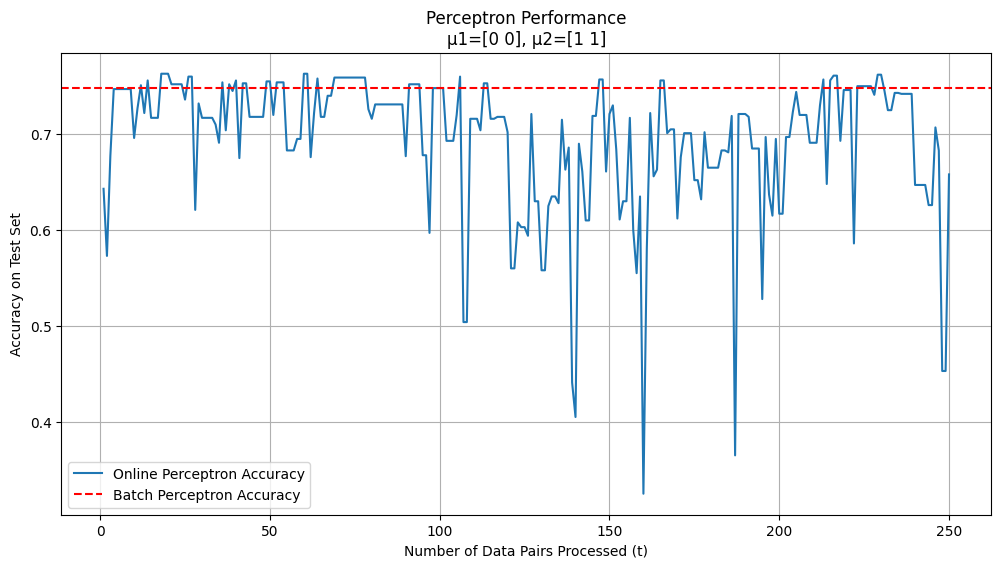

Final Online Perceptron Accuracy: 0.66
Batch Perceptron Accuracy: 0.75



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

class OnlinePerceptron:
    def __init__(self, dimension, learning_rate=1.0):
        self.w = np.zeros(dimension)
        self.b = 0.0
        self.eta = learning_rate

    def predict(self, x):
        activation = np.dot(self.w, x) + self.b
        return 1 if activation >= 0 else -1

    def update(self, x, y):
        prediction = self.predict(x)
        if prediction != y:
            self.w += self.eta * y * x
            self.b += self.eta * y

def generate_gaussian_data(mu, sigma, n_samples):
    return np.random.normal(loc=mu, scale=sigma, size=(n_samples, len(mu)))

def run_experiment(mu1, mu2, sigma=1.0, N=500, test_size=500):
    # Generate streaming data
    n_stream = N // 2
    data_A = generate_gaussian_data(mu1, sigma, n_stream)
    data_B = generate_gaussian_data(mu2, sigma, n_stream)

    # Combine and shuffle data for batch classifier
    X_batch = np.vstack((data_A, data_B))
    y_batch = np.hstack((np.ones(n_stream), -np.ones(n_stream)))

    # Initialize Online Perceptron
    online_perceptron = OnlinePerceptron(dimension=2, learning_rate=1.0)

    # Generate test set
    test_A = generate_gaussian_data(mu1, sigma, test_size)
    test_B = generate_gaussian_data(mu2, sigma, test_size)
    X_test = np.vstack((test_A, test_B))
    y_test = np.hstack((np.ones(test_size), -np.ones(test_size)))

    # Initialize variables to store performance
    online_accuracy = []

    # Online training
    for t in range(n_stream):
        # Get the t-th pair
        x_t = data_A[t]
        y_t = 1
        x_prime_t = data_B[t]
        y_prime_t = -1

        # Update with Class A example
        online_perceptron.update(x_t, y_t)

        # Update with Class B example
        online_perceptron.update(x_prime_t, y_prime_t)

        # Evaluate on test set
        predictions = []
        for x in X_test:
            pred = online_perceptron.predict(x)
            predictions.append(pred)
        acc = accuracy_score(y_test, predictions)
        online_accuracy.append(acc)

    # Train batch Perceptron
    batch_perceptron = Perceptron(max_iter=1000, tol=1e-3)
    batch_perceptron.fit(X_batch, y_batch)
    batch_predictions = batch_perceptron.predict(X_test)
    batch_accuracy = accuracy_score(y_test, batch_predictions)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, n_stream + 1), online_accuracy, label='Online Perceptron Accuracy')
    plt.axhline(y=batch_accuracy, color='r', linestyle='--', label='Batch Perceptron Accuracy')
    plt.title(f'Perceptron Performance\nμ1={mu1}, μ2={mu2}')
    plt.xlabel('Number of Data Pairs Processed (t)')
    plt.ylabel('Accuracy on Test Set')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Final Online Perceptron Accuracy: {online_accuracy[-1]:.2f}')
    print(f'Batch Perceptron Accuracy: {batch_accuracy:.2f}\n')

# Define different mean pairs for easy and difficult cases
mean_pairs = [
    # Easy case: well-separated
    (np.array([0, 0]), np.array([5, 5])),
    # Difficult case: overlapping
    (np.array([0, 0]), np.array([1, 1]))
]

# Run experiments for each mean pair
for idx, (mu1, mu2) in enumerate(mean_pairs, 1):
    print(f"--- Experiment {idx}: μ1={mu1}, μ2={mu2} ---")
    run_experiment(mu1, mu2, sigma=1.0, N=500, test_size=500)


Explanation:

* **Class Definition:**
We define an OnlinePerceptron class that maintains a set of weights and a bias. This class has two main methods:
  * predict: This method uses the current weights and bias to classify a point.
  * update: This method updates the weights and bias based on the prediction error of the incoming point.

* **Memory Efficiency:**
The perceptron only needs to store the weights and bias, so the memory usage is very low, regardless of the number of data points seen.

* **Synthetic Data:**
 We generate 2D data from two Gaussian distributions for class A and class B. In the "easy" case, the means of the two distributions are far apart, making the classification easier. In the "hard" case, the means are close together, making classification more challenging.

* **Training:**
The model is trained iteratively as pairs of observations from the two classes arrive sequentially. For each pair, the model is updated twice: once for the class A observation and once for the class B observation.



In [ ]:
# Generate test data
X_A_test, X_B_test = generate_data(500, mu1_easy, mu2_easy)
X_A_test_hard, X_B_test_hard = generate_data(500, mu1_hard, mu2_hard)

# Evaluate performance at the end of training
def evaluate_performance(perceptron, X_A, X_B):
    correct_A = np.sum([perceptron.predict(x) == 1 for x in X_A])
    correct_B = np.sum([perceptron.predict(x) == -1 for x in X_B])
    total_correct = correct_A + correct_B
    accuracy = total_correct / (len(X_A) + len(X_B))
    return accuracy

# Easy case accuracy
accuracy_easy = evaluate_performance(perceptron_easy, X_A_test, X_B_test)
print(f"Accuracy (Easy Case): {accuracy_easy:.2f}")

# Hard case accuracy
accuracy_hard = evaluate_performance(perceptron_hard, X_A_test_hard, X_B_test_hard)


Accuracy (Easy Case): 0.88


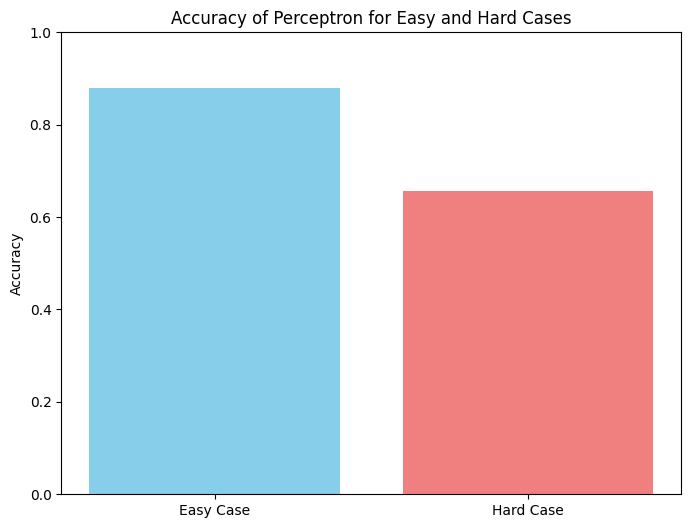

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
accuracies = [accuracy_easy, accuracy_hard]
labels = ['Easy Case', 'Hard Case']

# Create a bar plot to compare accuracies
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1)  # Limit y-axis to show range from 0 to 1
plt.ylabel('Accuracy')
plt.title('Accuracy of Perceptron for Easy and Hard Cases')
plt.show()


----

**Resources :**

- **"Pattern Recognition and Machine Learning" by Christopher M. Bishop**  
  - Covers linear models and online learning concepts.

- **"The Elements of Statistical Learning" by Trevor Hastie, Robert Tibshirani, and Jerome Friedman**  
  - Detailed explanations of linear classifiers and statistical learning.


- [Coursera: "Machine Learning" by Andrew Ng](https://www.coursera.org/learn/machine-learning)  


- [Perceptron Algorithm Article on Machine Learning Mastery](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python)  

- [Scikit-learn Documentation on Incremental Learning](https://scikit-learn.org/stable/modules/scaling_strategies.html#incremental-learning)  

- [Streaming Machine Learning Algorithms on Google Developers](https://developers.google.com/machine-learning/clustering/streaming)  

---------
----------
-----------

## Exercise 5 - [10%]

Relying on the central hypothesis that a learning problem should enjoy regularity along the domain of the data (see [Lab 1](http://kalogeratos.com/MyCourses/DML-M2HPC/Lab1.ipynb)), we would like to define a heuristic data-driven measure to evaluate a given model.

More specifically, consider a classification problem and define a regularity measure based on the nearest neighbors principle that can assess how regular the decisions of a given classifier is. Explain the logic of your proposition. Let's call this function **Regularity(X, Y, +any needed parameters)**.

**Recipe for testing**

In this exercise you have to generated data from a mixture of 2 Gaussian distributions, and then measure the effect of your Regularity measure and the standard Accuracy with regards to the following factors:

* the size of the dataset; try generating classes of same standard deviation $\sigma = 2$ and equal size, where each of them will have $n_i\in\{50, 100, 200, 500\}$ objects;
* the dimensionality $d$ of the data; try $d\in\{1,2,3,...\,,10, 20, 30,...\,100\}$;
* the overlap of the classes $\delta$ in the feature space, i.e. the distance between the classes; try $\delta\in\{\sigma, 2\sigma, 3\sigma, 4\sigma\}$;
* the input parameter $k$ which indirectly adjusts how far from an object the classifier will seek for `advices' from other objects in order to classify it; try $k\in\{1,...\,,10\}$.

**Sample pseudocode:**  

for each tuple <$n$, $d$, $\delta$, $k$>
   * generate data  
   * compute average quality over $10$ runs of the following  
       * train a $k$NN classifier and a decision tree (choose nicely the depth)   
       * test the classifiers using Accuracy and Regularity  

end for

The evaluation should be performed with and without 10-fold CV (inside the train/test nested part). Use at least the suggested value range for each parameter, but you can extend it if this way you capture some interesting behavior.

**Questions:**
- What is the main difference between a $k$NN and a radius-NN classifier? In which case(s) one is better to the other? How would we have to adapt the above discussion if radius-NN classifier is used instead of the standard $k$NN?
- What would change if we were interested in measuring the Regularity in the context of a regression problem?

### **Resolution of Exercise 5 - Regularity Measure Using Nearest Neighbors**

In this exercise, we're asked to develop a heuristic measure called **Regularity**, which assesses how consistently a classifier performs across the data domain, based on the nearest neighbors principle. We will then test this measure in different scenarios involving datasets of varying sizes, dimensions, class overlaps, and the number of neighbors \(k\) considered in the classifier.

### **Regularity Measure Logic**:
The idea behind **Regularity** is to evaluate how locally consistent the decisions made by a classifier are. Specifically, we will:
- Compute how often the predicted class label for a data point matches the majority label of its \( k \)-nearest neighbors.
- A model with high regularity will make decisions that are consistent with the nearby points, implying that the model has learned the structure of the data well.
- The **Regularity** function will calculate the fraction of points for which the classifier’s decision agrees with the labels of its nearest neighbors.

### **Regularity Function Implementation**:

In [64]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Regularity function based on nearest neighbors principle
def Regularity(X, Y, classifier, k=5):
    """
    Regularity measure to assess how regular a classifier's predictions are.

    Parameters:
    - X: Input data
    - Y: True labels
    - classifier: Fitted classifier model
    - k: Number of nearest neighbors to use for regularity calculation

    Returns:
    - Regularity score (float)
    """
    # Fit a k-NN classifier using the input data and true labels
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)

    # Get the classifier's predictions
    predictions = classifier.predict(X)

    # Compute the neighbors' majority label for each point
    neighbors_labels = knn.kneighbors(X, return_distance=False)
    consistent_count = 0

    # For each point, check if the classifier's prediction matches the majority of its k-nearest neighbors
    for i in range(len(X)):
        neighbor_labels = Y[neighbors_labels[i]]
        majority_label = np.argmax(np.bincount(neighbor_labels))
        if predictions[i] == majority_label:
            consistent_count += 1

    return consistent_count / len(X)


### **Recipe for Testing**:

We need to generate datasets with varying parameters and test the performance of both **Accuracy** and **Regularity** measures across different conditions. Specifically, we'll:
1. Generate data from two Gaussian distributions.
2. Evaluate the effect of:
   - **Dataset size** (\(n\)): Vary the number of samples per class (\(50, 100, 200, 500\)).
   - **Dimensionality** (\(d\)): Test with increasing feature dimensions (\(1, 2, 3, ..., 100\)).
   - **Class overlap** (\(\delta\)): Vary the distance between class means (\(\sigma, 2\sigma, 3\sigma, 4\sigma\)).
   - **Number of neighbors \(k\)**: Adjust the number of nearest neighbors (\(k \in \{1, 2, \dots, 10\}\)).

### **Implementation to Test the Regularity and Accuracy**:


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate Gaussian distributed data
def generate_gaussian_data(n, d, delta, sigma=2):
    centers = [[-delta/2] * d, [delta/2] * d]
    X, Y = make_blobs(n_samples=n*2, centers=centers, cluster_std=sigma, n_features=d)
    return X, Y

# Main loop to evaluate classifiers and compute regularity and accuracy
def evaluate_classifiers(n_values, d_values, delta_values, k_values):
    results = []

    for n in n_values:
        for d in d_values:
            for delta in delta_values:
                for k in k_values:
                    # Generate data
                    X, Y = generate_gaussian_data(n, d, delta)

                    # Split data into train and test sets
                    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

                    # Train classifiers
                    knn = KNeighborsClassifier(n_neighbors=k)
                    tree = DecisionTreeClassifier(max_depth=5)

                    knn.fit(X_train, Y_train)
                    tree.fit(X_train, Y_train)

                    # Evaluate accuracy
                    knn_acc = accuracy_score(Y_test, knn.predict(X_test))
                    tree_acc = accuracy_score(Y_test, tree.predict(X_test))

                    # Evaluate regularity
                    knn_regularity = Regularity(X_train, Y_train, knn, k=k)
                    tree_regularity = Regularity(X_train, Y_train, tree, k=k)

                    # Store the results
                    results.append({
                        'n': n,
                        'd': d,
                        'delta': delta,
                        'k': k,
                        'knn_accuracy': knn_acc,
                        'tree_accuracy': tree_acc,
                        'knn_regularity': knn_regularity,
                        'tree_regularity': tree_regularity
                    })

    return results

# Parameters to test
n_values = [50, 100, 200, 500]
d_values = [1, 2, 3, 10, 20, 30, 100]
delta_values = [2, 4, 6, 8]
k_values = range(1, 11)

# Run the evaluation
results = evaluate_classifiers(n_values, d_values, delta_values, k_values)

# Visualize results for different n and delta values
for result in results[:5]:  # Just to keep output manageable
    print(result)

{'n': 50, 'd': 1, 'delta': 2, 'k': 1, 'knn_accuracy': 0.7, 'tree_accuracy': 0.85, 'knn_regularity': 1.0, 'tree_regularity': 0.8}
{'n': 50, 'd': 1, 'delta': 2, 'k': 2, 'knn_accuracy': 0.65, 'tree_accuracy': 0.4, 'knn_regularity': 1.0, 'tree_regularity': 0.65}
{'n': 50, 'd': 1, 'delta': 2, 'k': 3, 'knn_accuracy': 0.75, 'tree_accuracy': 0.7, 'knn_regularity': 1.0, 'tree_regularity': 0.8875}
{'n': 50, 'd': 1, 'delta': 2, 'k': 4, 'knn_accuracy': 0.6, 'tree_accuracy': 0.55, 'knn_regularity': 1.0, 'tree_regularity': 0.7875}
{'n': 50, 'd': 1, 'delta': 2, 'k': 5, 'knn_accuracy': 0.65, 'tree_accuracy': 0.55, 'knn_regularity': 1.0, 'tree_regularity': 0.8}



### **Explanation**:
1. **Data Generation**: The `generate_gaussian_data()` function generates two Gaussian-distributed classes with specified dimensions, overlap (\(\delta\)), and dataset size.
2. **Classifier Training**:
   - We train both a **k-Nearest Neighbors (k-NN)** classifier and a **Decision Tree** on the generated data.
   - The **depth** of the Decision Tree is limited to avoid overfitting.
3. **Accuracy and Regularity**:
   - For each classifier, we compute the **accuracy** using the test set.
   - We compute the **regularity** using the `Regularity()` function defined earlier, which checks if the classifier’s decision is consistent with the majority vote of its nearest neighbors.

### **Visualization**:
We can visualize the results by plotting the **accuracy** and **regularity** against various parameters such as dataset size, dimensionality, class overlap, and number of neighbors.

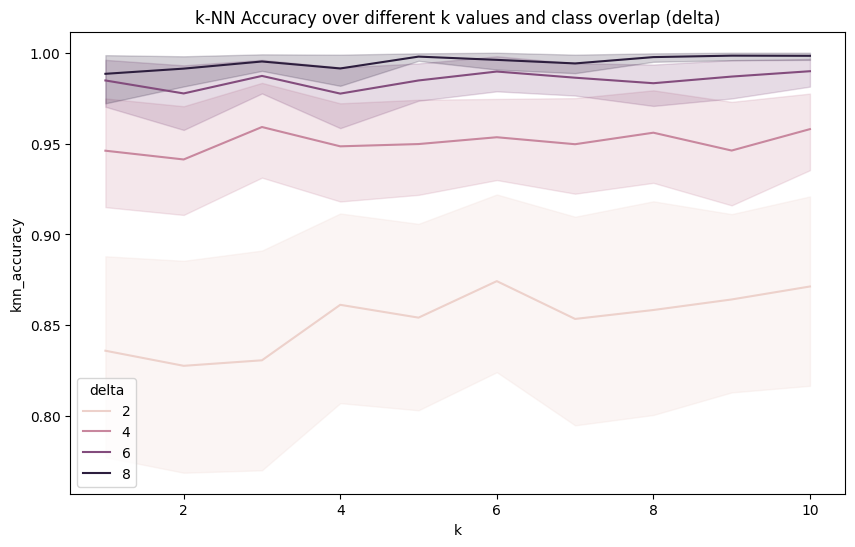

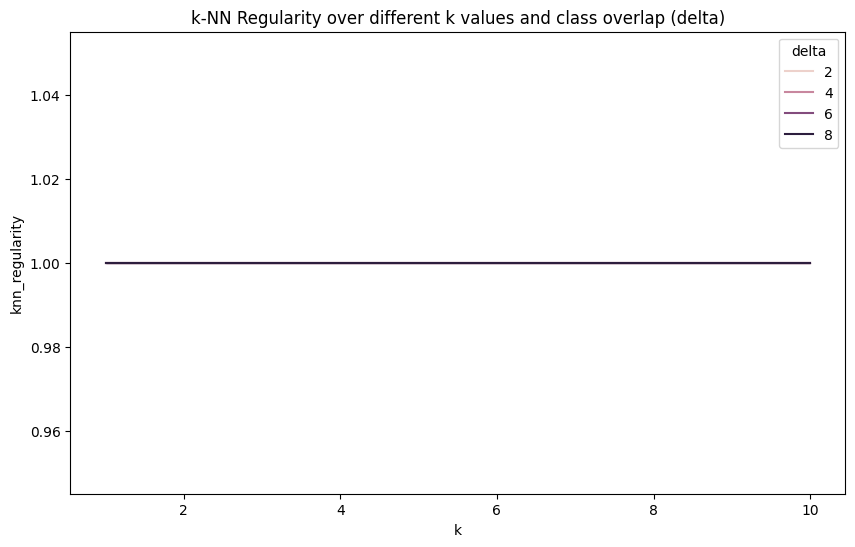

In [66]:
# Example visualization of accuracy and regularity over different k values
import seaborn as sns

# Convert results to a Pandas DataFrame for easier plotting (optional)
import pandas as pd
df_results = pd.DataFrame(results)

# Plotting accuracy vs k for knn
plt.figure(figsize=(10, 6))
sns.lineplot(x='k', y='knn_accuracy', hue='delta', data=df_results)
plt.title('k-NN Accuracy over different k values and class overlap (delta)')
plt.show()

# Plotting regularity vs k for knn
plt.figure(figsize=(10, 6))
sns.lineplot(x='k', y='knn_regularity', hue='delta', data=df_results)
plt.title('k-NN Regularity over different k values and class overlap (delta)')
plt.show()



### **Questions**:

1. **Difference between k-NN and Radius-NN Classifiers**:
   - **k-NN**: For each point, it considers exactly \( k \) neighbors to make a decision. It works well when the data is well-distributed and there are enough neighbors available in the local neighborhood.
   - **Radius-NN**: Instead of using a fixed number \( k \), it considers all neighbors within a certain radius. Radius-NN is useful when data density varies because it adapts to the local structure of the data by considering neighbors that are closer.

   **Comparison**:
   - Radius-NN is more flexible in areas where the data is sparse, while k-NN works better in more uniformly distributed datasets.
   - In this problem, if we used Radius-NN, the discussion would adapt by focusing on choosing an optimal radius rather than choosing an optimal number of neighbors \( k \).

2. **Measuring Regularity in Regression**:
   - In a **regression** problem, we would measure **Regularity** by assessing how consistent the model's predictions are with the predictions of nearby points. Instead of comparing class labels, we would compare the predicted values and see if the predictions for nearby points are similar.
   - Regularity would ensure that the model's predictions are smooth and follow the structure of the data without large discontinuities between neighboring points.

---
### References

- **Lab 1**: Kalogeratos, A. (2023). *DML-M2HPC Lab 1 Notebook*. http://kalogeratos.com/MyCourses/DML-M2HPC/Lab1.ipynb

- **scikit-learn Developers**. (2023). *scikit-learn Machine Learning Library for Python*. https://scikit-learn.org/stable/

  - Used for implementing k-Nearest Neighbors classifiers, Decision Trees, cross-validation, and other machine learning essential tools.

- **NumPy Developers**. (2023). *NumPy Documentation*. https://numpy.org/doc/




-------------
----------------
---------------

## Exercise 6 - [10%]

Apply ridge regression and lasso regression on the diabetes dataset. Use all the features but the 11th as input parameters, and the 11th as target (it's an index showing the progression of the disease).
* Search for a good $a$ regularization penalty using Cross Validation (use built-in functions of scikit-learn) for each mehtod, as in the examples 4 and 5 of Lab 2.
* Generate plots that show the evolution of all the coefficients (the elements of the $w$ vector) and -in a second plot- regression scores such as the resiguals and the [$R^2$ measure](https://en.wikipedia.org/wiki/Coefficient_of_determination) showing how well the model fits to the data.
* Discuss your comparative findings.

Best alpha for Ridge Regression: {'alpha': 0.0004498432668969444}
Best alpha for Lasso Regression: {'alpha': 0.0029470517025518097}


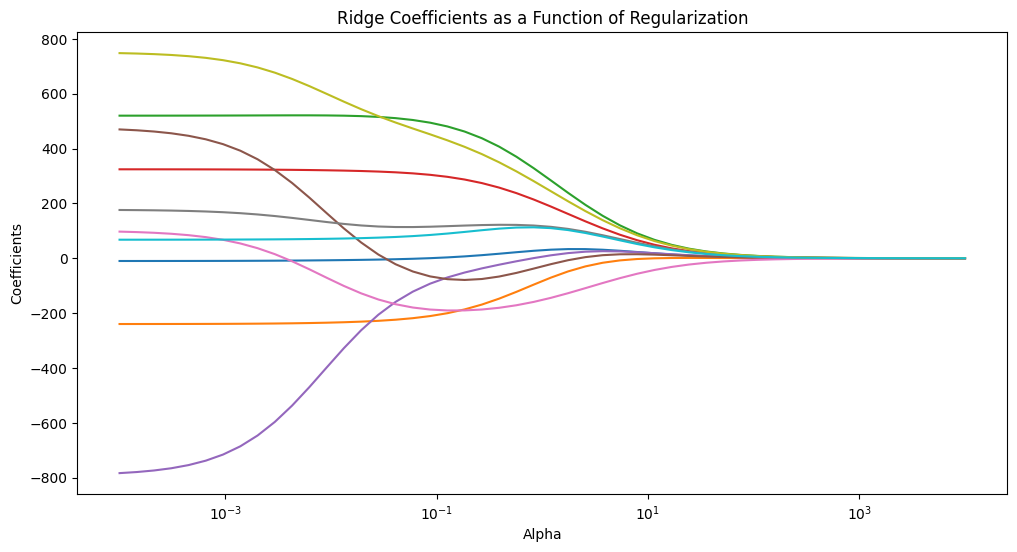

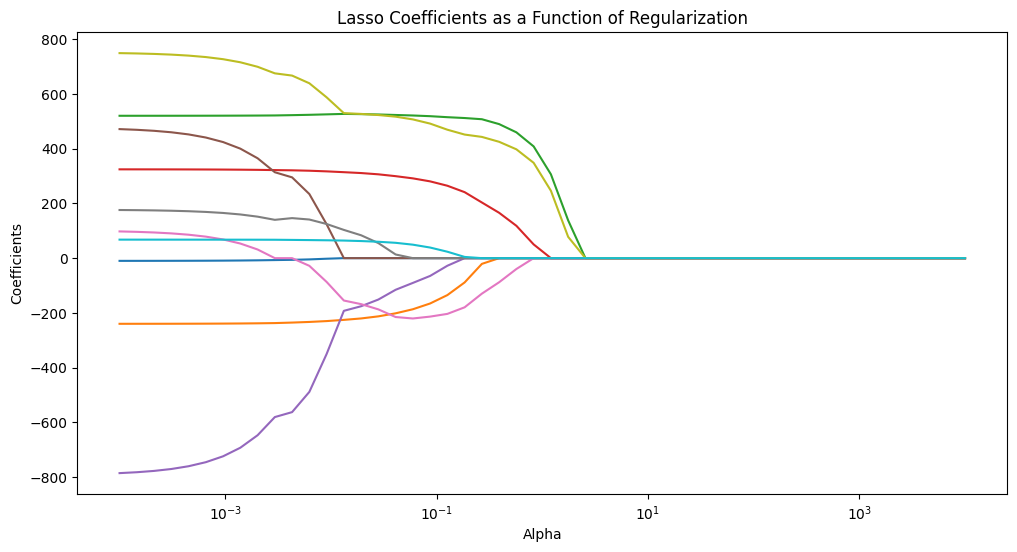

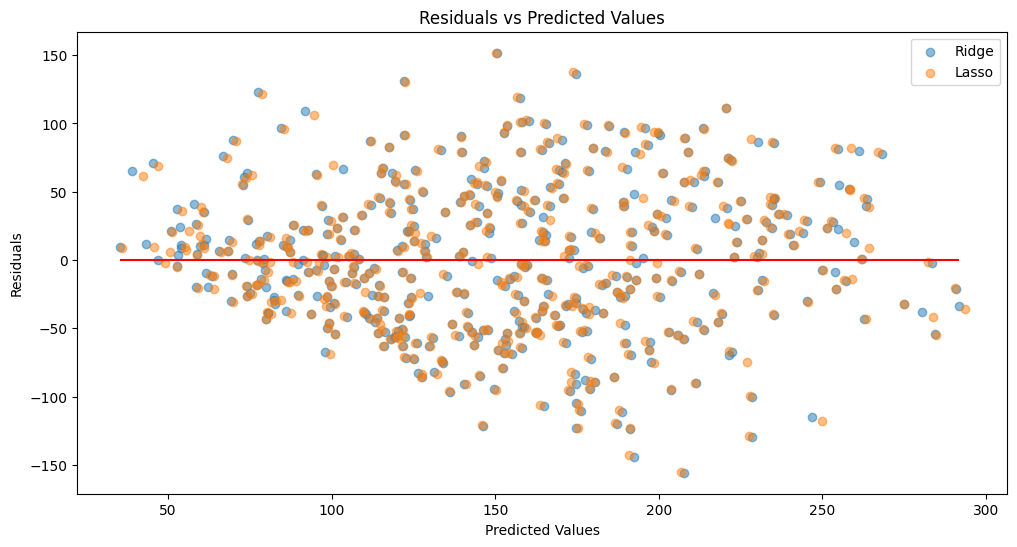

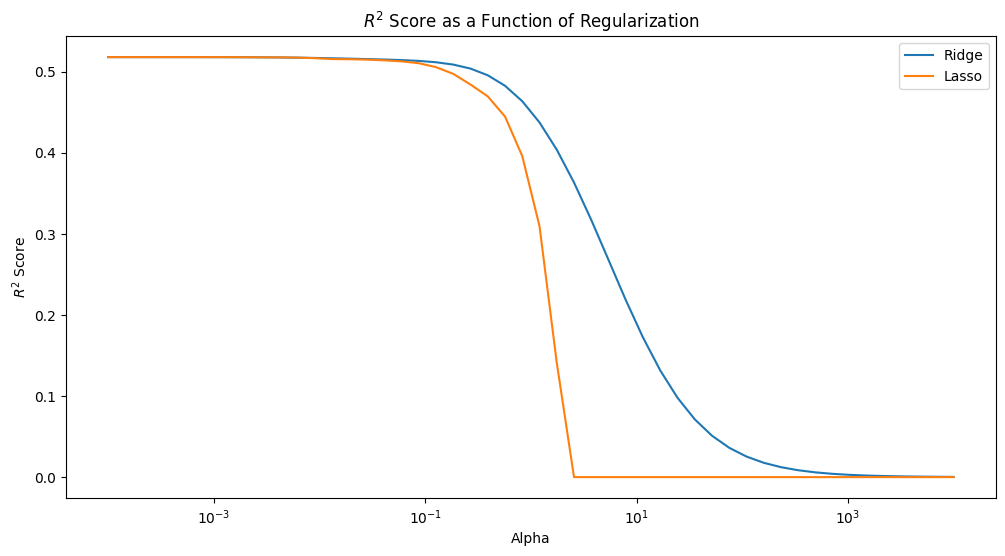

Best $R^2$ Score for Ridge Regression: 0.5177389615348458
Best $R^2$ Score for Lasso Regression: 0.5174497244551881


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target variable

alphas = np.logspace(-4, 4, 50)

#Ridge Regression
ridge = Ridge()
parameters = {'alpha': alphas}
ridge_cv = GridSearchCV(ridge, parameters, cv=5)
ridge_cv.fit(X, y)
print("Best alpha for Ridge Regression:", ridge_cv.best_params_)

#Lasso
lasso = Lasso(max_iter=10000)
parameters = {'alpha': alphas}
lasso_cv = GridSearchCV(lasso, parameters, cv=5)
lasso_cv.fit(X, y)
print("Best alpha for Lasso Regression:", lasso_cv.best_params_)

#Evaluation of Ridge Regression
coefs_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

#Evaluation of Lasso Regression
coefs_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

#Plotting Coefficients for Ridge Regression
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization')
plt.axis('tight')
plt.show()

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Regularization')
plt.axis('tight')
plt.show()

# Best Ridge Model
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X)
residuals_ridge = y - y_pred_ridge
r2_ridge = r2_score(y, y_pred_ridge)

# Best Lasso Model
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X)
residuals_lasso = y - y_pred_lasso
r2_lasso = r2_score(y, y_pred_lasso)

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5, label='Ridge')
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5, label='Lasso')
plt.hlines(y=0, xmin=min(y_pred_ridge), xmax=max(y_pred_ridge), colors='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

# Ridge R^2 Scores
r2_scores_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    y_pred = ridge.predict(X)
    r2 = r2_score(y, y_pred)
    r2_scores_ridge.append(r2)

# Lasso R^2 Scores
r2_scores_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X, y)
    y_pred = lasso.predict(X)
    r2 = r2_score(y, y_pred)
    r2_scores_lasso.append(r2)

plt.figure(figsize=(12, 6))
plt.plot(alphas, r2_scores_ridge, label='Ridge')
plt.plot(alphas, r2_scores_lasso, label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score as a Function of Regularization')
plt.legend()
plt.show()

print("Best $R^2$ Score for Ridge Regression:", r2_ridge)
print("Best $R^2$ Score for Lasso Regression:", r2_lasso)


1. **Ridge Regressio**n:
As α increases, the magnitude of the coefficients decreases gradually. The coefficients never reach exactly zero. This behavior is due to the $L2$ regularization, which penalizes large coefficients but doesn't enforce sparsity.

2. **Lasso Regression:**
With increasing αα, many coefficients shrink to exactly zero. This results in a sparse model with fewer features contributing to the predictions.
The $L1$ regularization promotes sparsity by penalizing the absolute sum of the coefficients.

3. **$R²$ Measure:**
For small α, both models achieve similar $R^2$ score around $0.5$. But, as α increases, the $R^2$ score for Lasso drops more rapidly than for Ridge. Ridge tends to maintain a better fit with higher αα values compared to Lasso.


###**Conclusion :**
By applying **Ridge** and **Lasso regression** to the diabetes dataset and tuning the regularization parameter αα using cross-validation, we observed:

* **Ridge Regression** provides a stable solution, retaining all features and performing well in terms of the $R^2$ score.
* **Lasso Regression** simplifies the model by eliminating less significant features, which can be advantageous for interpretability but may reduce predictive performance.

The choice between Ridge and Lasso regression depends on the specific goals:

* If the focus is on **prediction accuracy and all features are considered important**, **Ridge Regression** is preferable.
* If the goal is **model simplicity and identifying the most influential features**, **Lasso Regression** is the better choice.

## References

1. **Diabetes Dataset Documentation (scikit-learn)**:  
    
   [scikit-learn Diabetes Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

2. **Ridge and Lasso Regression (scikit-learn)**:  
     
   - [Ridge Regression in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)  
   - [Lasso Regression in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

3. **Regularization Techniques (Machine Learning Mastery)**:  
    
   [Ridge and Lasso Regression with scikit-learn](https://machinelearningmastery.com/ridge-regression-with-python/)

4. **Cross-Validation with Grid Search (scikit-learn)**:  
   Scikit-learn’s `GridSearchCV` documentation explains how to perform grid search for hyperparameter tuning using cross-validation.  
   [GridSearchCV in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

5. **Coefficient of Determination \( R^2 \) (Wikipedia)**:  
   [Coefficient of Determination \( R^2 \)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

6. **Python Machine Learning Textbook** (Sebastian Raschka and Vahid Mirjalili):  
     [Python Machine Learning (Amazon)](https://www.amazon.com/Python-Machine-Learning-powerful-predictive/dp/1789955750)


------------
------------
--------------